# Packages

In [2]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1. The linear model 

Assumptions:
- The errors have mean zero; otherwise the forecasts will be systematically biased.
- The errors are not autocorrelated; otherwise the forecasts will be inefficient, as there is more information in the data that can be exploited.
- The errors  are unrelated to the predictor variables; otherwise there would be more information that should be included in the systematic part of the model

Example: US consumption expenditure
- quarterly percentage changes (growth rates) of real personal consumption expenditure,  
$y$
 , and real personal disposable income,   $x$ , for the US from 1970 Q1 to 2019 Q2.

- https://tidyr.tidyverse.org/articles/pivot.html 

In [3]:
us_change

Quarter Consumption Income     Production  Savings      Unemployment
1   1970 Q1  0.61856640  1.0448013 -2.45248553   5.2990141   0.9        
2   1970 Q2  0.45198402  1.2256472 -0.55145947   7.7898938   0.5        
3   1970 Q3  0.87287178  1.5851538 -0.35865175   7.4039841   0.5        
4   1970 Q4 -0.27184793 -0.2395449 -2.18569087   1.1698982   0.7        
5   1971 Q1  1.90134496  1.9759249  1.90976436   3.5356669  -0.1        
6   1971 Q2  0.91487735  1.4459085  0.90156952   5.8747636  -0.1        
7   1971 Q3  0.79410964  0.5211491  0.30803071  -0.4062353   0.1        
8   1971 Q4  1.64563316  1.1591761  2.29136214  -1.4862589   0.0        
9   1972 Q1  1.31118969  0.4568567  4.15429495  -4.2919722  -0.2        
10  1972 Q2  1.88577788  1.0333893  1.88867271  -4.6921964  -0.1        
11  1972 Q3  1.52933361  1.9262949  1.26541145   5.9234540  -0.2        
12  1972 Q4  2.31955754  3.9299492  3.43958747  16.0735141  -0.3        
13  1973 Q1  1.80928217  0.7556427  2.79414525  -4.7589832  -0.3        
14  1973 Q2 -0.04509061  0.8403923  0.83217448   8.6151011   0.0        
15  1973 Q3  0.35135318  0.4510266  0.85862449   2.9480635  -0.1        
16  1973 Q4 -0.29869339  1.0881608  1.48200795  10.8349639   0.1        
17  1974 Q1 -0.89869876 -1.6741912 -0.88609656  -2.3625108   0.2        
18  1974 Q2  0.35940645 -0.9344403  0.05894791  -6.3018544   0.3        
19  1974 Q3  0.42864101  0.0903256 -0.39493018   0.4466351   0.5        
20  1974 Q4 -1.47250253 -0.1336754 -4.05070223  10.9899284   1.3        
21  1975 Q1  0.83524738 -0.1505418 -6.83603945  -5.1770838   1.4        
22  1975 Q2  1.63148743  4.5218688 -1.35939960  23.7392807   0.2        
23  1975 Q3  1.41124035 -1.4643423  2.42591788 -17.0840985  -0.4        
24  1975 Q4  1.06959158  0.7786936  2.15784549   0.7937147  -0.2        
25  1976 Q1  1.97965950  1.2003233  3.02870765  -2.4194882  -0.6        
26  1976 Q2  0.91584535  0.5663527  1.26991500  -0.9726696   0.0        
27  1976 Q3  1.04735216  0.7771957  1.32796180   0.3939361   0.0        
28  1976 Q4  1.28914016  0.6324554  1.78768419  -2.8542505   0.2        
29  1977 Q1  1.17179885  0.2244761  2.05356944  -6.2734816  -0.4        
30  1977 Q2  0.54078143  0.9355104  3.05148479   5.8395263  -0.2        
⋮   ⋮       ⋮           ⋮          ⋮           ⋮            ⋮           
169 2012 Q1 0.7997592    1.8546191  0.94854995  15.64792838 -0.3        
170 2012 Q2 0.1482683    0.9050116  0.63447000   9.20564881  0.0        
171 2012 Q3 0.1630397   -0.7184021  0.01019725  -9.28944189 -0.4        
172 2012 Q4 0.4471923    2.7326089  0.52306130  26.00101854  0.1        
173 2013 Q1 0.5171984   -4.0844195  0.77969494 -56.47190972 -0.4        
174 2013 Q2 0.0719452    0.7422486  0.42909942  10.75860987  0.0        
175 2013 Q3 0.4059027    0.4314045  0.35611641   1.58427629 -0.3        
176 2013 Q4 0.8579759    0.3943067  0.68210300  -5.78260692 -0.5        
177 2014 Q1 0.3931571    1.3833211  0.76735762  14.62587433  0.0        
178 2014 Q2 1.0889537    1.3529276  1.32862991   5.25332235 -0.6        
179 2014 Q3 1.0702826    1.1605783  0.59108852   2.17927500 -0.2        
180 2014 Q4 1.2054266    1.3130115  0.65403062   1.72020988 -0.3        
181 2015 Q1 0.8272678    1.1292929 -0.76730655   4.01969762 -0.2        
182 2015 Q2 0.7928127    0.7495874 -1.35183543   0.33456221 -0.1        
183 2015 Q3 0.7594273    0.7323707 -0.01777189   0.49577940 -0.3        
184 2015 Q4 0.4468239    0.3167496 -1.31442273  -1.69949104  0.0        
185 2016 Q1 0.7782543    0.6661374 -0.51892196  -0.07568514  0.0        
186 2016 Q2 0.7155914   -0.1065885 -0.57869515  -9.38621669 -0.1        
187 2016 Q3 0.6349156    0.4472701  0.45807071  -2.09617211  0.1        
188 2016 Q4 0.6185453    0.5980377  0.32814541   0.10885389 -0.3        
189 2017 Q1 0.5933365    1.1920316  0.58427288  10.17889613 -0.3        
190 2017 Q2 0.5931534    0.6648103  1.36345260   0.78382422 -0.1        
191 2017 Q3 0.5847379    0.5797157 -0.20111512   0.47774011 -0

In [4]:
us_change %>%
 pivot_longer(c(Consumption, Income), names_to="Series") 

Quarter Production Savings     Unemployment Series      value      
1   1970 Q1 -2.4524855  5.2990141   0.9         Consumption  0.61856640
2   1970 Q1 -2.4524855  5.2990141   0.9         Income       1.04480133
3   1970 Q2 -0.5514595  7.7898938   0.5         Consumption  0.45198402
4   1970 Q2 -0.5514595  7.7898938   0.5         Income       1.22564719
5   1970 Q3 -0.3586518  7.4039841   0.5         Consumption  0.87287178
6   1970 Q3 -0.3586518  7.4039841   0.5         Income       1.58515384
7   1970 Q4 -2.1856909  1.1698982   0.7         Consumption -0.27184793
8   1970 Q4 -2.1856909  1.1698982   0.7         Income      -0.23954487
9   1971 Q1  1.9097644  3.5356669  -0.1         Consumption  1.90134496
10  1971 Q1  1.9097644  3.5356669  -0.1         Income       1.97592495
11  1971 Q2  0.9015695  5.8747636  -0.1         Consumption  0.91487735
12  1971 Q2  0.9015695  5.8747636  -0.1         Income       1.44590853
13  1971 Q3  0.3080307 -0.4062353   0.1         Consumption  0.79410964
14  1971 Q3  0.3080307 -0.4062353   0.1         Income       0.52114911
15  1971 Q4  2.2913621 -1.4862589   0.0         Consumption  1.64563316
16  1971 Q4  2.2913621 -1.4862589   0.0         Income       1.15917609
17  1972 Q1  4.1542950 -4.2919722  -0.2         Consumption  1.31118969
18  1972 Q1  4.1542950 -4.2919722  -0.2         Income       0.45685671
19  1972 Q2  1.8886727 -4.6921964  -0.1         Consumption  1.88577788
20  1972 Q2  1.8886727 -4.6921964  -0.1         Income       1.03338931
21  1972 Q3  1.2654114  5.9234540  -0.2         Consumption  1.52933361
22  1972 Q3  1.2654114  5.9234540  -0.2         Income       1.92629490
23  1972 Q4  3.4395875 16.0735141  -0.3         Consumption  2.31955754
24  1972 Q4  3.4395875 16.0735141  -0.3         Income       3.92994922
25  1973 Q1  2.7941453 -4.7589832  -0.3         Consumption  1.80928217
26  1973 Q1  2.7941453 -4.7589832  -0.3         Income       0.75564273
27  1973 Q2  0.8321745  8.6151011   0.0         Consumption -0.04509061
28  1973 Q2  0.8321745  8.6151011   0.0         Income       0.84039233
29  1973 Q3  0.8586245  2.9480635  -0.1         Consumption  0.35135318
30  1973 Q3  0.8586245  2.9480635  -0.1         Income       0.45102659
⋮   ⋮       ⋮          ⋮           ⋮            ⋮           ⋮          
367 2015 Q4 -1.3144227 -1.69949104  0.0         Consumption  0.4468239 
368 2015 Q4 -1.3144227 -1.69949104  0.0         Income       0.3167496 
369 2016 Q1 -0.5189220 -0.07568514  0.0         Consumption  0.7782543 
370 2016 Q1 -0.5189220 -0.07568514  0.0         Income       0.6661374 
371 2016 Q2 -0.5786952 -9.38621669 -0.1         Consumption  0.7155914 
372 2016 Q2 -0.5786952 -9.38621669 -0.1         Income      -0.1065885 
373 2016 Q3  0.4580707 -2.09617211  0.1         Consumption  0.6349156 
374 2016 Q3  0.4580707 -2.09617211  0.1         Income       0.4472701 
375 2016 Q4  0.3281454  0.10885389 -0.3         Consumption  0.6185453 
376 2016 Q4  0.3281454  0.10885389 -0.3         Income       0.5980377 
377 2017 Q1  0.5842729 10.17889613 -0.3         Consumption  0.5933365 
378 2017 Q1  0.5842729 10.17889613 -0.3         Income       1.1920316 
379 2017 Q2  1.3634526  0.78382422 -0.1         Consumption  0.5931534 
380 2017 Q2  1.3634526  0.78382422 -0.1         Income       0.6648103 
381 2017 Q3 -0.2011151  0.47774011 -0.1         Consumption  0.5847379 
382 2017 Q3 -0.2011151  0.47774011 -0.1         Income       0.5797157 
383 2017 Q4  1.8121311 -1.32309670 -0.1         Consumption  1.1331456 
384 2017 Q4  1.8121311 -1.32309670 -0.1         Income       0.9072104 
385 2018 Q1  0.5643717 17.41552718 -0.1         Consumption  0.4169630 
386 2018 Q1  0.5643717 17.41552718 -0.1         Income       1.6657258 
387 2018 Q2  1.1174238 -2.72397446  0.0         Consumption  0.9831119 
388 2018 Q2  1.1174238 -2.72397446  0.0         Income       0.6618253 
389 2018 Q3  1.2567223 -0.08568609 -0.3         Consumption  0.8531814 
390 2018 Q3  1.2567223 -0.08568609 -0.3     

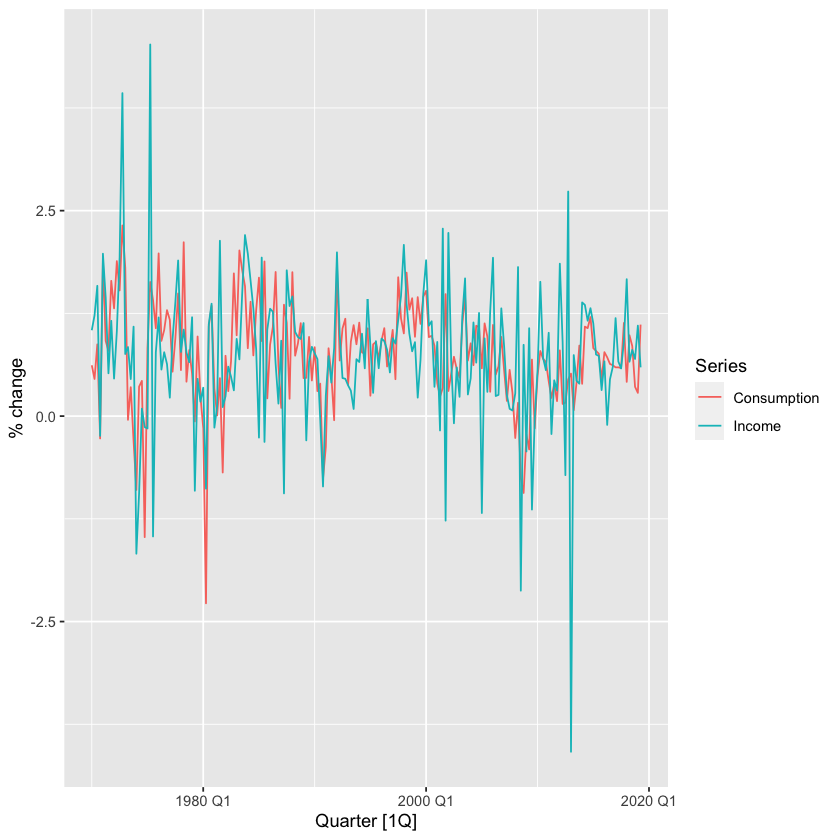

In [5]:
us_change %>%
  pivot_longer(c(Consumption, Income), names_to="Series") %>%
  autoplot(value) +
  labs(y = "% change")

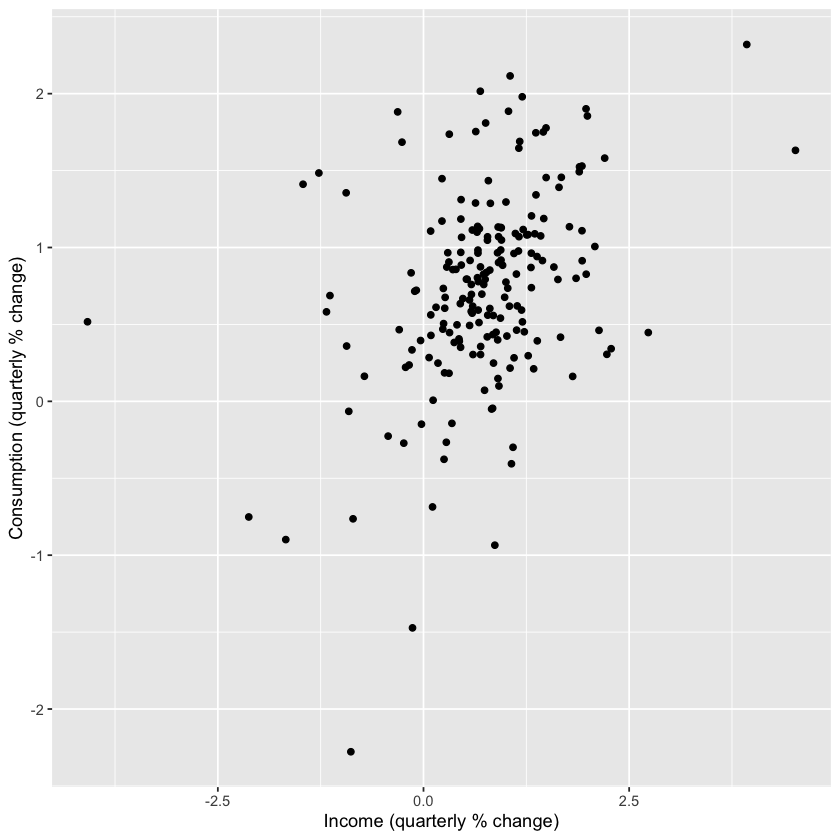

In [7]:
us_change %>%
 ggplot(aes(x=Income, y=Consumption))+
 labs(y="Consumption (quarterly % change)",
      x= "Income (quarterly % change)")+
geom_point()

`geom_smooth()` using formula 'y ~ x'



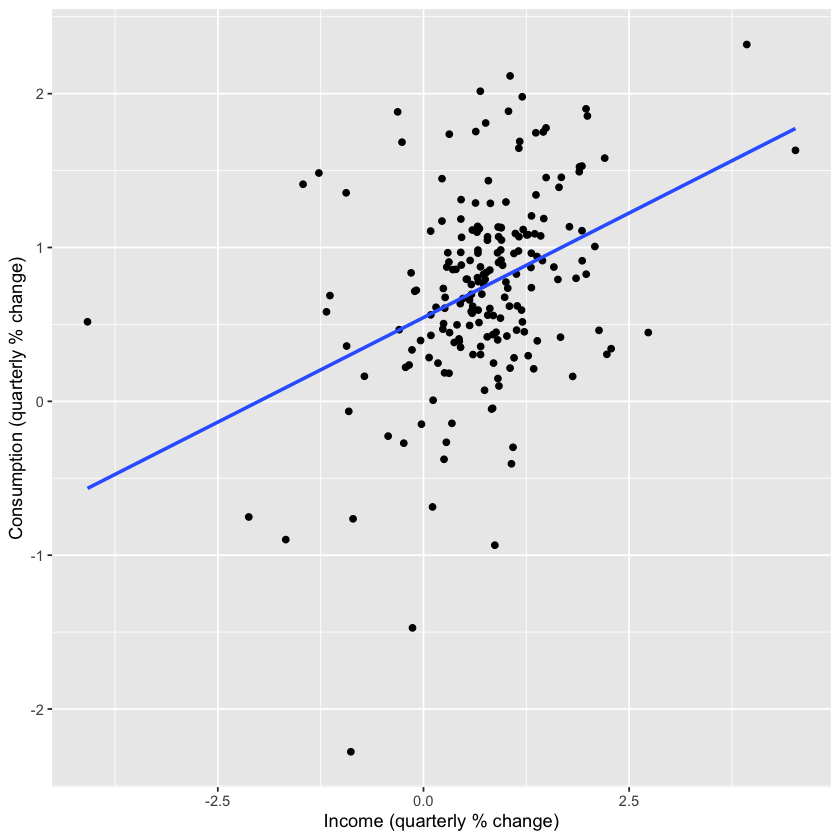

In [12]:
us_change %>%
 ggplot(aes(x=Income, y=Consumption))+
 labs( y ="Consumption (quarterly % change)",
       x = "Income (quarterly % change)")+
geom_point()+
geom_smooth(method="lm",se=FALSE) 

`geom_smooth()` using formula 'y ~ x'



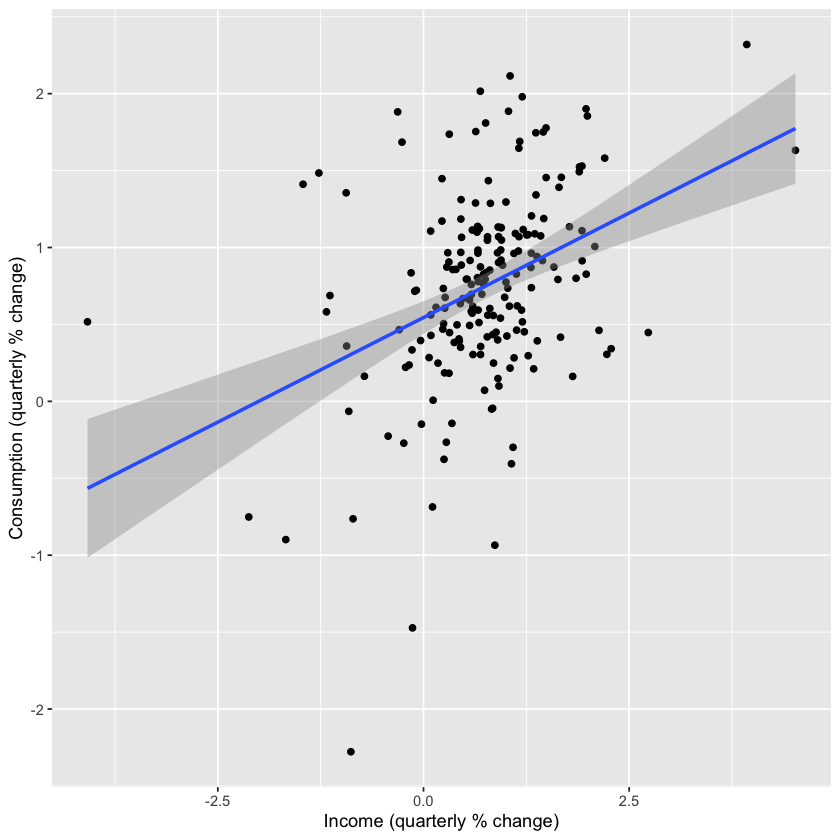

In [13]:
us_change %>%
 ggplot(aes(x=Income, y=Consumption))+
 labs( y ="Consumption (quarterly % change)",
       x = "Income (quarterly % change)")+
geom_point()+
geom_smooth(method="lm",se=TRUE) 

tslm is used to fit linear models to time series including trend and seasonality components.



In [14]:
us_change %>%
 model(
      TSLM( Consumption ~ Income)
      ) %>%
report()


Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58236 -0.27777  0.01862  0.32330  1.42229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54454    0.05403  10.079  < 2e-16 ***
Income       0.27183    0.04673   5.817  2.4e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5905 on 196 degrees of freedom
Multiple R-squared: 0.1472,	Adjusted R-squared: 0.1429
F-statistic: 33.84 on 1 and 196 DF, p-value: 2.4022e-08


In [16]:
us_change[1:5,]

Quarter Consumption Income     Production Savings  Unemployment
1 1970 Q1  0.6185664   1.0448013 -2.4524855 5.299014  0.9        
2 1970 Q2  0.4519840   1.2256472 -0.5514595 7.789894  0.5        
3 1970 Q3  0.8728718   1.5851538 -0.3586518 7.403984  0.5        
4 1970 Q4 -0.2718479  -0.2395449 -2.1856909 1.169898  0.7        
5 1971 Q1  1.9013450   1.9759249  1.9097644 3.535667 -0.1

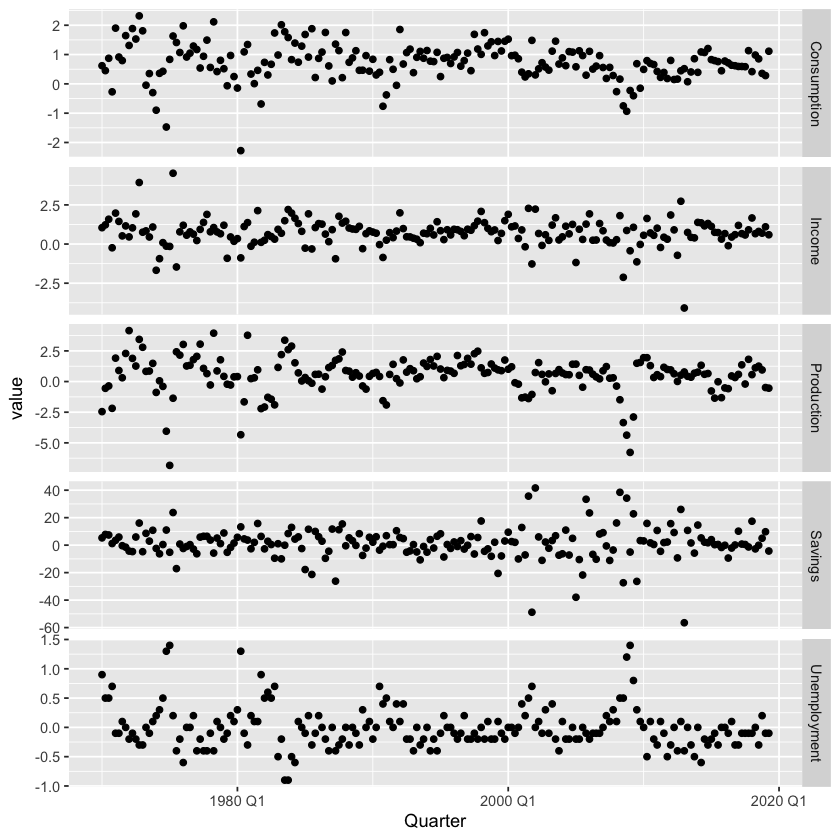

In [22]:
us_change %>%
  select(Quarter, Consumption, Income, Production, Savings, Unemployment) %>%
  gather(stat, value, Consumption:Unemployment) %>%
  ggplot(aes(Quarter, value)) +
  geom_point() + 
  facet_grid(stat~., scales = "free")

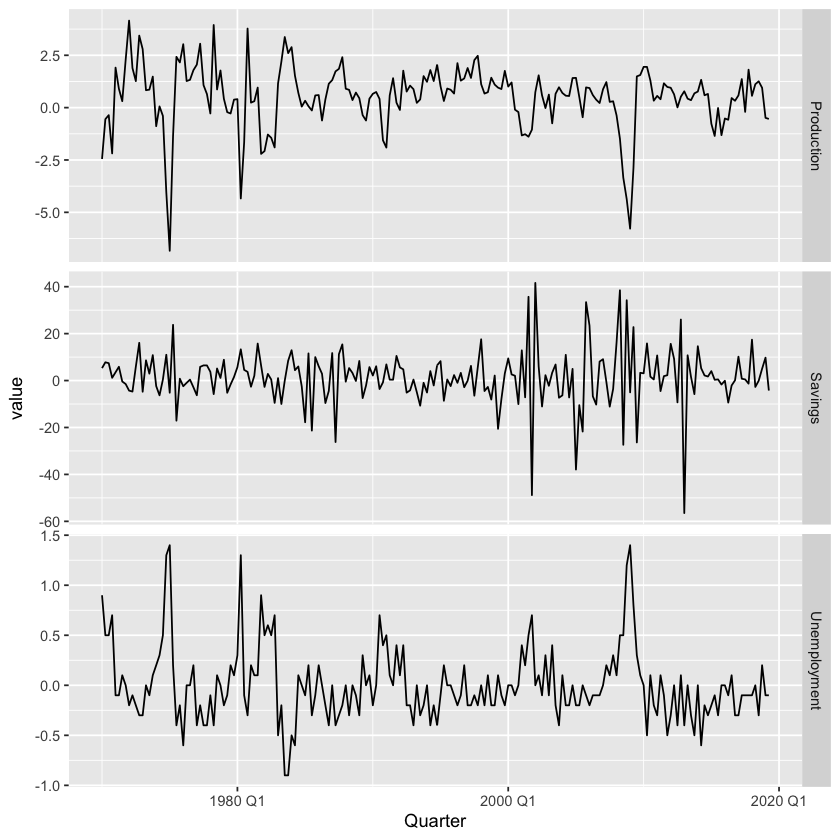

In [24]:
us_change %>%
  select(Quarter, Production, Savings, Unemployment) %>%
  gather(stat, value, Production:Unemployment) %>%
  ggplot(aes(Quarter, value)) +
  geom_line() + 
  facet_grid(stat~., scales = "free")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



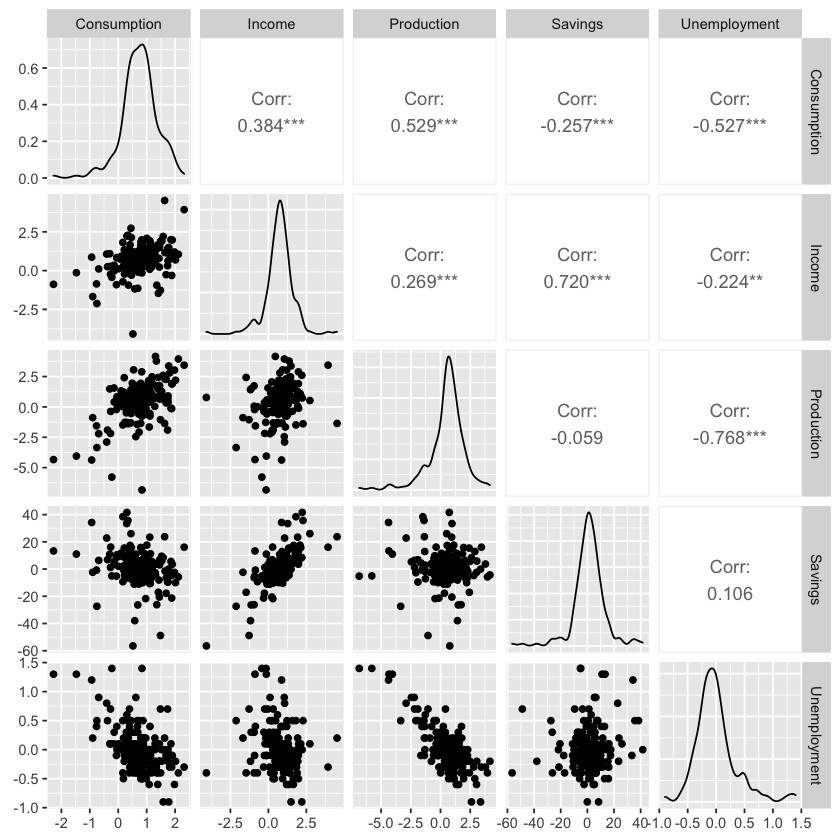

In [25]:
us_change %>%
 GGally::ggpairs(columns =2:6)

# 2. Least Squares Estimation

Example: US consumption expenditure

In [27]:
fit_consMR <- us_change %>%
 model(
      tslm=TSLM(Consumption ~ Income + Production+ Unemployment +Savings )
      )

In [28]:
fit_consMR

tslm  
1 <TSLM>

In [29]:
report(fit_consMR)

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90555 -0.15821 -0.03608  0.13618  1.15471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253105   0.034470   7.343 5.71e-12 ***
Income        0.740583   0.040115  18.461  < 2e-16 ***
Production    0.047173   0.023142   2.038   0.0429 *  
Unemployment -0.174685   0.095511  -1.829   0.0689 .  
Savings      -0.052890   0.002924 -18.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3102 on 193 degrees of freedom
Multiple R-squared: 0.7683,	Adjusted R-squared: 0.7635
F-statistic:   160 on 4 and 193 DF, p-value: < 2.22e-16


In [30]:
augment(fit_consMR) 

.model Quarter Consumption .fitted    .resid      .innov     
1   tslm   1970 Q1  0.61856640  0.4736953  0.14487110  0.14487110
2   tslm   1970 Q2  0.45198402  0.6354343 -0.18345027 -0.18345027
3   tslm   1970 Q3  0.87287178  0.9311850 -0.05831326 -0.05831326
4   tslm   1970 Q4 -0.27184793 -0.2115584 -0.06028955 -0.06028955
5   tslm   1971 Q1  1.90134496  1.6369977  0.26434723  0.26434723
6   tslm   1971 Q2  0.91487735  1.0732020 -0.15832467 -0.15832467
7   tslm   1971 Q3  0.79410964  0.6576074  0.13650219  0.13650219
8   tslm   1971 Q4  1.64563316  1.2982697  0.34736343  0.34736343
9   tslm   1972 Q1  1.31118969  1.0493546  0.26183510  0.26183510
10  tslm   1972 Q2  1.88577788  1.3731492  0.51262871  0.51262871
11  tslm   1972 Q3  1.52933361  1.4610249  0.06830872  0.06830872
12  tslm   1972 Q4  2.31955754  2.5280904 -0.20853281 -0.20853281
13  tslm   1973 Q1  1.80928217  1.2486376  0.56064461  0.56064461
14  tslm   1973 Q2 -0.04509061  0.4590879 -0.50417846 -0.50417846
15  tslm   1973 Q3  0.35135318  0.4891766 -0.13782340 -0.13782340
16  tslm   1973 Q4 -0.29869339  0.5383581 -0.83705146 -0.83705146
17  tslm   1974 Q1 -0.89869876 -0.9385563  0.03985756  0.03985756
18  tslm   1974 Q2  0.35940645 -0.1552450  0.51465140  0.51465140
19  tslm   1974 Q3  0.42864101  0.1904036  0.23823737  0.23823737
20  tslm   1974 Q4 -1.47250253 -0.8453245 -0.62717804 -0.62717804
21  tslm   1975 Q1  0.83524738 -0.1516003  0.98684772  0.98684772
22  tslm   1975 Q2  1.63148743  2.2472895 -0.61580204 -0.61580204
23  tslm   1975 Q3  1.41124035  0.2565284  1.15471190  1.15471190
24  tslm   1975 Q4  1.06959158  0.9245413  0.14505026  0.14505026
25  tslm   1976 Q1  1.97965950  1.5176950  0.46196451  0.46196451
26  tslm   1976 Q2  0.91584535  0.7838864  0.13195896  0.13195896
27  tslm   1976 Q3  1.04735216  0.8704915  0.17686063  0.17686063
28  tslm   1976 Q4  1.28914016  0.9218455  0.36729467  0.36729467
29  tslm   1977 Q1  1.17179885  0.9179000  0.25389889  0.25389889
30  tslm   1977 Q2  0.54078143  0.8159589 -0.27517749 -0.27517749
⋮   ⋮      ⋮       ⋮           ⋮          ⋮           ⋮          
169 tslm   2012 Q1 0.7997592   0.8961356  -0.09637643 -0.09637643
170 tslm   2012 Q2 0.1482683   0.4663834  -0.31811510 -0.31811510
171 tslm   2012 Q3 0.1630397   0.2827433  -0.11970356 -0.11970356
172 tslm   2012 Q4 0.4471923   0.9088387  -0.46164636 -0.46164636
173 tslm   2013 Q1 0.5171984   0.3217121   0.19548626  0.19548626
174 tslm   2013 Q2 0.0719452   0.2540197  -0.18207447 -0.18207447
175 tslm   2013 Q3 0.4059027   0.5580081  -0.15210534 -0.15210534
176 tslm   2013 Q4 0.8579759   0.9704841  -0.11250821 -0.11250821
177 tslm   2014 Q1 0.3931571   0.5402038  -0.14704673 -0.14704673
178 tslm   2014 Q2 1.0889537   1.1446981  -0.05574440 -0.05574440
179 tslm   2014 Q3 1.0702826   1.0601683   0.01011428  0.01011428
180 tslm   2014 Q4 1.2054266   1.2177755  -0.01234893 -0.01234893
181 tslm   2015 Q1 0.8272678   0.8755797  -0.04831192 -0.04831192
182 tslm   2015 Q2 0.7928127   0.7442410   0.04857173  0.04857173
183 tslm   2015 Q3 0.7594273   0.8208321  -0.06140478 -0.06140478
184 tslm   2015 Q4 0.4468239   0.5155661  -0.06874220 -0.06874220
185 tslm   2016 Q1 0.7782543   0.7259595   0.05229480  0.05229480
186 tslm   2016 Q2 0.7155914   0.6607755   0.05481587  0.05481587
187 tslm   2016 Q3 0.6349156   0.6993526  -0.06443706 -0.06443706
188 tslm   2016 Q4 0.6185453   0.7581297  -0.13958438 -0.13958438
189 tslm   2017 Q1 0.5933365   0.6775082  -0.08417167 -0.08417167
190 tslm   2017 Q2 0.5931534   0.7857822  -0.19262882 -0.19262882
191 tslm   2017 Q3 0.5847379   0.6651467  -0.08040877 -0.08040877
192 tslm   2017 Q4 1.1331456   1.0979004   0.03524521  0.03524521
193 tslm   2018 Q1 0.4169630   0.6096961  -0.19273314 -0.19273314
194 tslm   2018 Q2 0.9831119   0.9400252   0.04308674  0.04308674
195 tslm   2018 Q3 0.8531814   0.9664367  -0.11325534 -0.11325534
196 tslm   2018 Q4 0.3565120   0.5115975  -0.15508547 -0.15508547
197 tslm   2019 Q1 0.2828855   0.5465204  -0

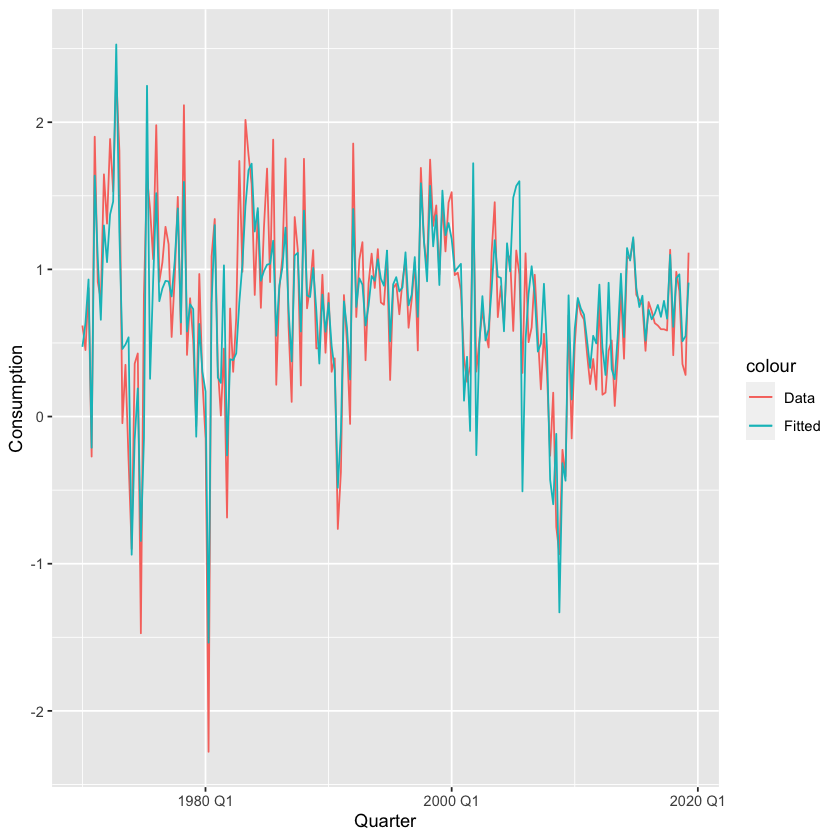

In [32]:
augment(fit_consMR)  %>%
 ggplot(aes(x=Quarter))+
 geom_line(aes(y=Consumption, colour="Data"))+
 geom_line(aes(y=.fitted,colour="Fitted")) 


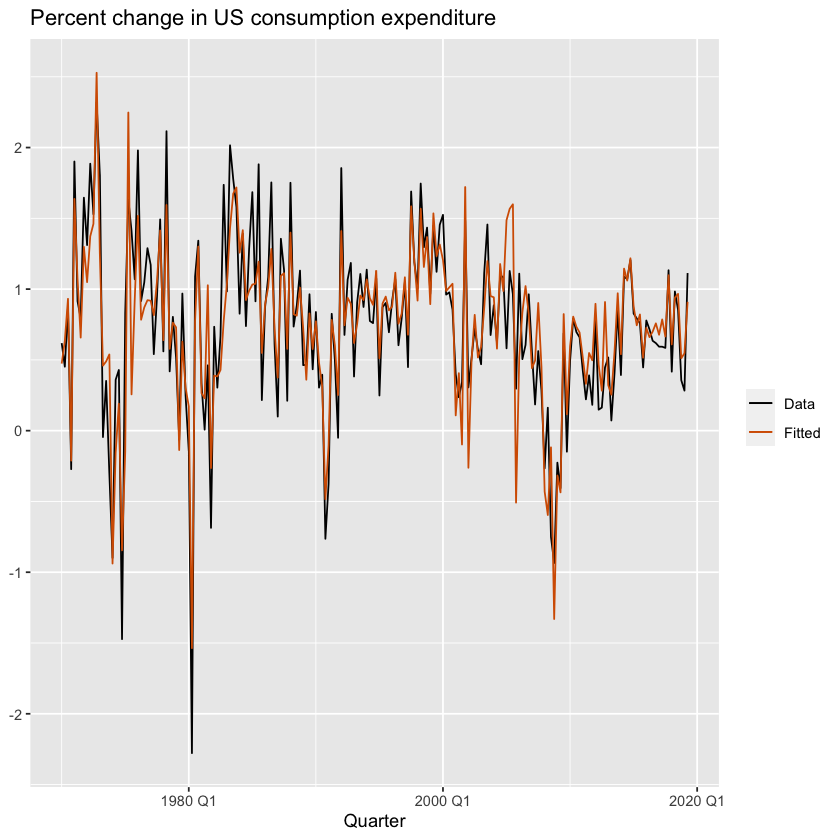

In [33]:
augment(fit_consMR)  %>%
 ggplot(aes(x=Quarter))+
 geom_line(aes(y=Consumption, colour="Data"))+
 geom_line(aes(y=.fitted,colour="Fitted"))  +
  labs(y = NULL,
    title = "Percent change in US consumption expenditure"
  ) +
  scale_colour_manual(values=c(Data="black",Fitted="#D55E00")) +
  guides(colour = guide_legend(title = NULL))

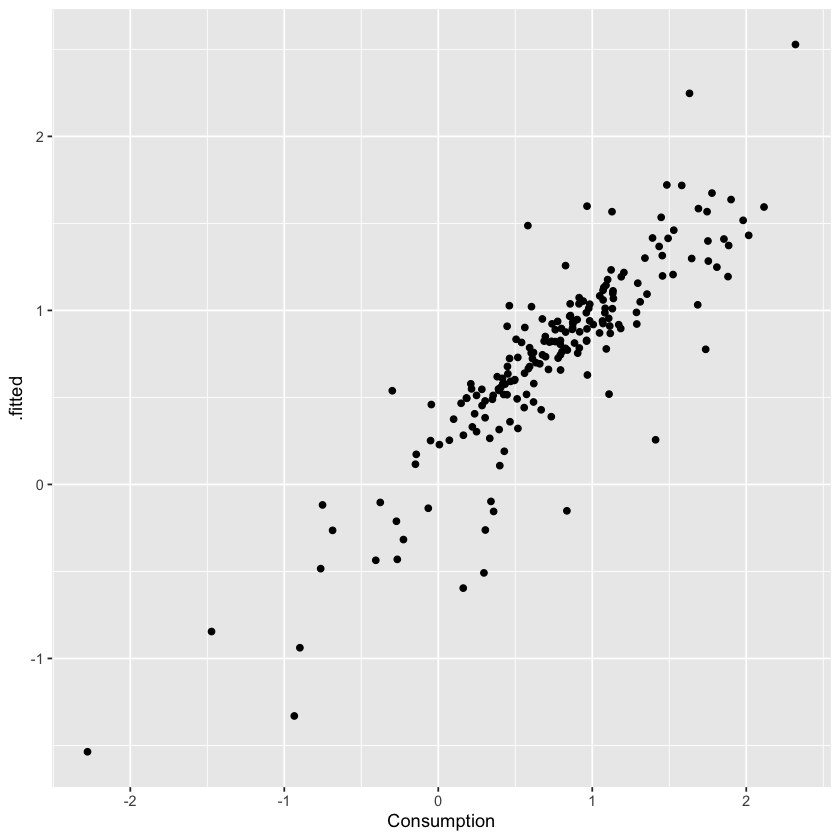

In [34]:
augment(fit_consMR) %>%
  ggplot(aes(x = Consumption, y = .fitted)) +
  geom_point()

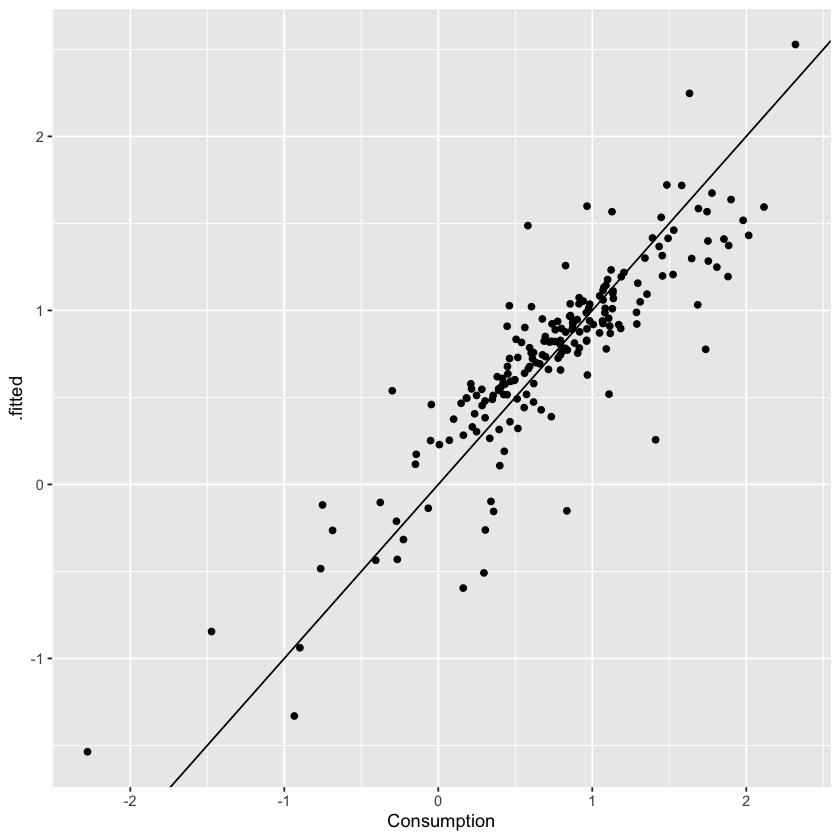

In [35]:
augment(fit_consMR) %>%
  ggplot(aes(x = Consumption, y = .fitted)) +
  geom_point()+
  geom_abline(intercept = 0, slope = 1)

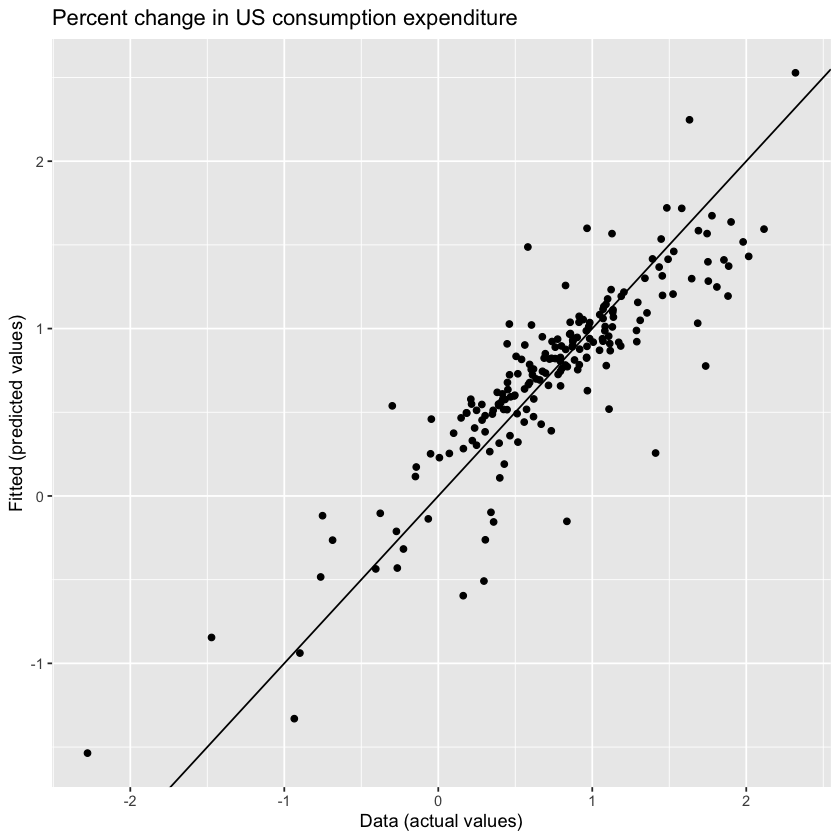

In [36]:
augment(fit_consMR) %>%
  ggplot(aes(x = Consumption, y = .fitted)) +
  geom_point()+
  geom_abline(intercept = 0, slope = 1) +
  labs(
    y = "Fitted (predicted values)",
    x = "Data (actual values)",
    title = "Percent change in US consumption expenditure"
  )

- A common way to summarise how well a linear regression model fits the data is via the coefficient of determination.
- Another measure of how well the model has fitted the data is the standard deviation of the residuals, which is often known as the “residual standard error.”

# 3.  Evaluating the regression model

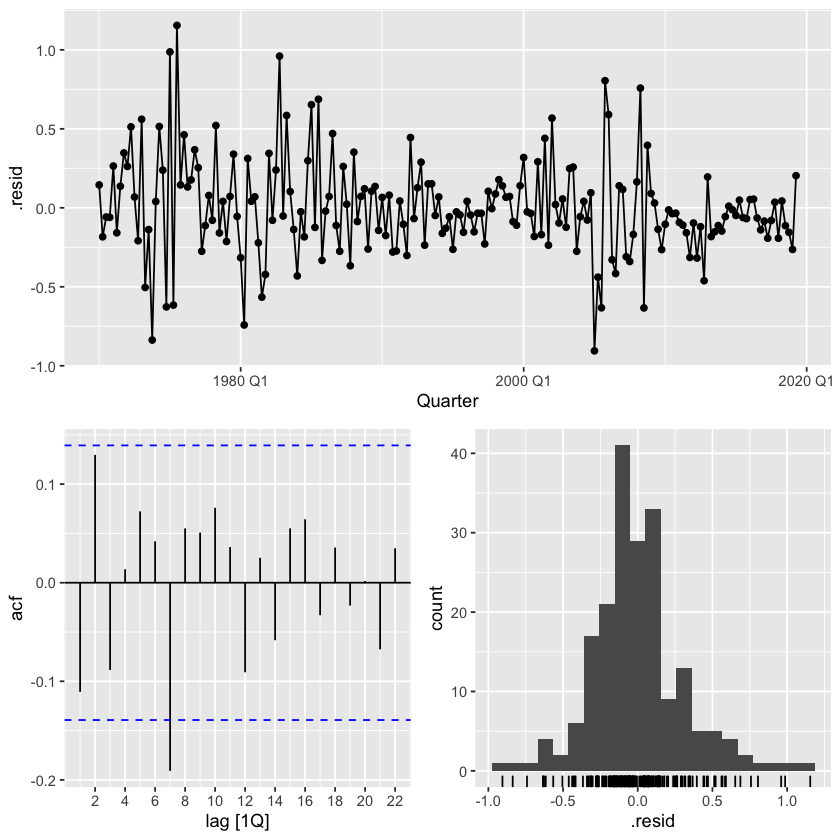

In [37]:
fit_consMR %>% gg_tsresiduals()

Analysing the residuals from a regression model for US quarterly consumption.

In [38]:
augment(fit_consMR) %>%
  features(.innov, ljung_box, lag = 10, dof = 5)

.model lb_stat  lb_pvalue  
1 tslm   18.86532 0.002036368

- The time plot shows some changing variation over time, but is otherwise relatively unremarkable. 
- This heteroscedasticity will potentially make the prediction interval coverage inaccurate.

- The histogram shows that the residuals seem to be slightly skewed, which may also affect the coverage probability of the prediction intervals.

- The autocorrelation plot shows a significant spike at lag 7, and a significant Ljung-Box test at the 5% level. 
- However, the autocorrelation is not particularly large, and at lag 7 it is unlikely to have any noticeable impact on the forecasts or the prediction intervals. 

- Later, dynamic regression models are used for better capturing information left in the residuals.

### Residual plots against predictors


In [44]:
us_change %>%
 left_join(residuals(fit_consMR), by="Quarter") %>%
 pivot_longer(Income:Unemployment,
              names_to = "regressor", values_to = "x") 

Quarter Consumption .model .resid      regressor    x          
1   1970 Q1  0.6185664  tslm    0.14487110 Income        1.0448013 
2   1970 Q1  0.6185664  tslm    0.14487110 Production   -2.4524855 
3   1970 Q1  0.6185664  tslm    0.14487110 Savings       5.2990141 
4   1970 Q1  0.6185664  tslm    0.14487110 Unemployment  0.9000000 
5   1970 Q2  0.4519840  tslm   -0.18345027 Income        1.2256472 
6   1970 Q2  0.4519840  tslm   -0.18345027 Production   -0.5514595 
7   1970 Q2  0.4519840  tslm   -0.18345027 Savings       7.7898938 
8   1970 Q2  0.4519840  tslm   -0.18345027 Unemployment  0.5000000 
9   1970 Q3  0.8728718  tslm   -0.05831326 Income        1.5851538 
10  1970 Q3  0.8728718  tslm   -0.05831326 Production   -0.3586518 
11  1970 Q3  0.8728718  tslm   -0.05831326 Savings       7.4039841 
12  1970 Q3  0.8728718  tslm   -0.05831326 Unemployment  0.5000000 
13  1970 Q4 -0.2718479  tslm   -0.06028955 Income       -0.2395449 
14  1970 Q4 -0.2718479  tslm   -0.06028955 Production   -2.1856909 
15  1970 Q4 -0.2718479  tslm   -0.06028955 Savings       1.1698982 
16  1970 Q4 -0.2718479  tslm   -0.06028955 Unemployment  0.7000000 
17  1971 Q1  1.9013450  tslm    0.26434723 Income        1.9759249 
18  1971 Q1  1.9013450  tslm    0.26434723 Production    1.9097644 
19  1971 Q1  1.9013450  tslm    0.26434723 Savings       3.5356669 
20  1971 Q1  1.9013450  tslm    0.26434723 Unemployment -0.1000000 
21  1971 Q2  0.9148773  tslm   -0.15832467 Income        1.4459085 
22  1971 Q2  0.9148773  tslm   -0.15832467 Production    0.9015695 
23  1971 Q2  0.9148773  tslm   -0.15832467 Savings       5.8747636 
24  1971 Q2  0.9148773  tslm   -0.15832467 Unemployment -0.1000000 
25  1971 Q3  0.7941096  tslm    0.13650219 Income        0.5211491 
26  1971 Q3  0.7941096  tslm    0.13650219 Production    0.3080307 
27  1971 Q3  0.7941096  tslm    0.13650219 Savings      -0.4062353 
28  1971 Q3  0.7941096  tslm    0.13650219 Unemployment  0.1000000 
29  1971 Q4  1.6456332  tslm    0.34736343 Income        1.1591761 
30  1971 Q4  1.6456332  tslm    0.34736343 Production    2.2913621 
⋮   ⋮       ⋮           ⋮      ⋮           ⋮            ⋮          
763 2017 Q3 0.5847379   tslm   -0.08040877 Savings       0.47774011
764 2017 Q3 0.5847379   tslm   -0.08040877 Unemployment -0.10000000
765 2017 Q4 1.1331456   tslm    0.03524521 Income        0.90721040
766 2017 Q4 1.1331456   tslm    0.03524521 Production    1.81213111
767 2017 Q4 1.1331456   tslm    0.03524521 Savings      -1.32309670
768 2017 Q4 1.1331456   tslm    0.03524521 Unemployment -0.10000000
769 2018 Q1 0.4169630   tslm   -0.19273314 Income        1.66572576
770 2018 Q1 0.4169630   tslm   -0.19273314 Production    0.56437175
771 2018 Q1 0.4169630   tslm   -0.19273314 Savings      17.41552718
772 2018 Q1 0.4169630   tslm   -0.19273314 Unemployment -0.10000000
773 2018 Q2 0.9831119   tslm    0.04308674 Income        0.66182534
774 2018 Q2 0.9831119   tslm    0.04308674 Production    1.11742376
775 2018 Q2 0.9831119   tslm    0.04308674 Savings      -2.72397446
776 2018 Q2 0.9831119   tslm    0.04308674 Unemployment  0.00000000
777 2018 Q3 0.8531814   tslm   -0.11325534 Income        0.80627128
778 2018 Q3 0.8531814   tslm   -0.11325534 Production    1.25672225
779 2018 Q3 0.8531814   tslm   -0.11325534 Savings      -0.08568609
780 2018 Q3 0.8531814   tslm   -0.11325534 Unemployment -0.30000000
781 2018 Q4 0.3565120   tslm   -0.15508547 Income        0.69514222
782 2018 Q4 0.3565120   tslm   -0.15508547 Production    0.94814805
783 2018 Q4 0.3565120   tslm   -0.15508547 Savings       5.03133660
784 2018 Q4 0.3565120   tslm   -0.15508547 Unemployment  0.20000000
785 2019 Q1 0.2828855   tslm   -0.26363489 Income        1.10075295
786 2019 Q1 0.2828855   tslm   -0.26363489 Production   -0.48820586
787 2019 Q1 0.2828855   tslm   -0.26363489 Savings       9.76028657
788 2019 Q1 0.2828855   tslm   -0.26363489 Unemployment -0.10000000
789 2019 Q2 1.1135167   tslm    0.20339595 Income        0.5

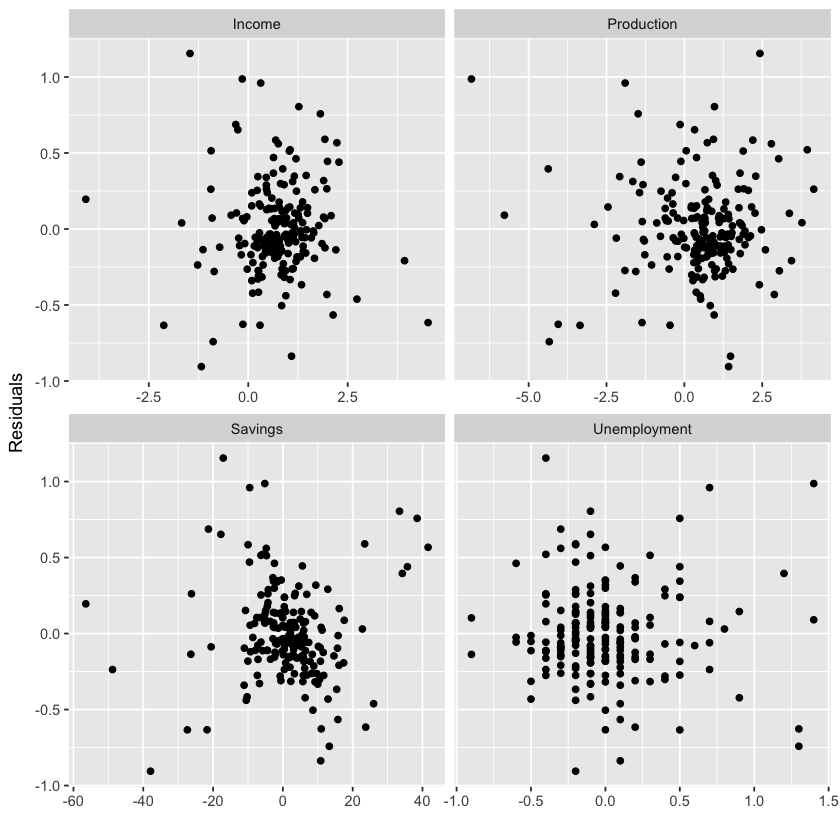

In [47]:
us_change %>%
 left_join(residuals(fit_consMR), by="Quarter") %>%
 pivot_longer(Income:Unemployment,
              names_to = "regressor", values_to = "x")  %>%
  ggplot(aes(x = x, y = .resid)) +
  geom_point() +
  facet_wrap(. ~ regressor, scales = "free_x") +
  labs(y = "Residuals", x = "")

- The residuals from the multiple regression model for forecasting US consumption plotted against each predictor seem to be randomly scattered. 
- Therefore we are satisfied with these in this case.

## Residual plots against fitted values


- A plot of the residuals against the fitted values should also show no pattern. 
- If a pattern is observed, there may be “heteroscedasticity” in the errors which means that the variance of the residuals may not be constant.
- If this problem occurs, a transformation of the forecast variable such as a logarithm or square root may be required

In [48]:
augment(fit_consMR)

.model Quarter Consumption .fitted    .resid      .innov     
1   tslm   1970 Q1  0.61856640  0.4736953  0.14487110  0.14487110
2   tslm   1970 Q2  0.45198402  0.6354343 -0.18345027 -0.18345027
3   tslm   1970 Q3  0.87287178  0.9311850 -0.05831326 -0.05831326
4   tslm   1970 Q4 -0.27184793 -0.2115584 -0.06028955 -0.06028955
5   tslm   1971 Q1  1.90134496  1.6369977  0.26434723  0.26434723
6   tslm   1971 Q2  0.91487735  1.0732020 -0.15832467 -0.15832467
7   tslm   1971 Q3  0.79410964  0.6576074  0.13650219  0.13650219
8   tslm   1971 Q4  1.64563316  1.2982697  0.34736343  0.34736343
9   tslm   1972 Q1  1.31118969  1.0493546  0.26183510  0.26183510
10  tslm   1972 Q2  1.88577788  1.3731492  0.51262871  0.51262871
11  tslm   1972 Q3  1.52933361  1.4610249  0.06830872  0.06830872
12  tslm   1972 Q4  2.31955754  2.5280904 -0.20853281 -0.20853281
13  tslm   1973 Q1  1.80928217  1.2486376  0.56064461  0.56064461
14  tslm   1973 Q2 -0.04509061  0.4590879 -0.50417846 -0.50417846
15  tslm   1973 Q3  0.35135318  0.4891766 -0.13782340 -0.13782340
16  tslm   1973 Q4 -0.29869339  0.5383581 -0.83705146 -0.83705146
17  tslm   1974 Q1 -0.89869876 -0.9385563  0.03985756  0.03985756
18  tslm   1974 Q2  0.35940645 -0.1552450  0.51465140  0.51465140
19  tslm   1974 Q3  0.42864101  0.1904036  0.23823737  0.23823737
20  tslm   1974 Q4 -1.47250253 -0.8453245 -0.62717804 -0.62717804
21  tslm   1975 Q1  0.83524738 -0.1516003  0.98684772  0.98684772
22  tslm   1975 Q2  1.63148743  2.2472895 -0.61580204 -0.61580204
23  tslm   1975 Q3  1.41124035  0.2565284  1.15471190  1.15471190
24  tslm   1975 Q4  1.06959158  0.9245413  0.14505026  0.14505026
25  tslm   1976 Q1  1.97965950  1.5176950  0.46196451  0.46196451
26  tslm   1976 Q2  0.91584535  0.7838864  0.13195896  0.13195896
27  tslm   1976 Q3  1.04735216  0.8704915  0.17686063  0.17686063
28  tslm   1976 Q4  1.28914016  0.9218455  0.36729467  0.36729467
29  tslm   1977 Q1  1.17179885  0.9179000  0.25389889  0.25389889
30  tslm   1977 Q2  0.54078143  0.8159589 -0.27517749 -0.27517749
⋮   ⋮      ⋮       ⋮           ⋮          ⋮           ⋮          
169 tslm   2012 Q1 0.7997592   0.8961356  -0.09637643 -0.09637643
170 tslm   2012 Q2 0.1482683   0.4663834  -0.31811510 -0.31811510
171 tslm   2012 Q3 0.1630397   0.2827433  -0.11970356 -0.11970356
172 tslm   2012 Q4 0.4471923   0.9088387  -0.46164636 -0.46164636
173 tslm   2013 Q1 0.5171984   0.3217121   0.19548626  0.19548626
174 tslm   2013 Q2 0.0719452   0.2540197  -0.18207447 -0.18207447
175 tslm   2013 Q3 0.4059027   0.5580081  -0.15210534 -0.15210534
176 tslm   2013 Q4 0.8579759   0.9704841  -0.11250821 -0.11250821
177 tslm   2014 Q1 0.3931571   0.5402038  -0.14704673 -0.14704673
178 tslm   2014 Q2 1.0889537   1.1446981  -0.05574440 -0.05574440
179 tslm   2014 Q3 1.0702826   1.0601683   0.01011428  0.01011428
180 tslm   2014 Q4 1.2054266   1.2177755  -0.01234893 -0.01234893
181 tslm   2015 Q1 0.8272678   0.8755797  -0.04831192 -0.04831192
182 tslm   2015 Q2 0.7928127   0.7442410   0.04857173  0.04857173
183 tslm   2015 Q3 0.7594273   0.8208321  -0.06140478 -0.06140478
184 tslm   2015 Q4 0.4468239   0.5155661  -0.06874220 -0.06874220
185 tslm   2016 Q1 0.7782543   0.7259595   0.05229480  0.05229480
186 tslm   2016 Q2 0.7155914   0.6607755   0.05481587  0.05481587
187 tslm   2016 Q3 0.6349156   0.6993526  -0.06443706 -0.06443706
188 tslm   2016 Q4 0.6185453   0.7581297  -0.13958438 -0.13958438
189 tslm   2017 Q1 0.5933365   0.6775082  -0.08417167 -0.08417167
190 tslm   2017 Q2 0.5931534   0.7857822  -0.19262882 -0.19262882
191 tslm   2017 Q3 0.5847379   0.6651467  -0.08040877 -0.08040877
192 tslm   2017 Q4 1.1331456   1.0979004   0.03524521  0.03524521
193 tslm   2018 Q1 0.4169630   0.6096961  -0.19273314 -0.19273314
194 tslm   2018 Q2 0.9831119   0.9400252   0.04308674  0.04308674
195 tslm   2018 Q3 0.8531814   0.9664367  -0.11325534 -0.11325534
196 tslm   2018 Q4 0.3565120   0.5115975  -0.15508547 -0.15508547
197 tslm   2019 Q1 0.2828855   0.5465204  -0

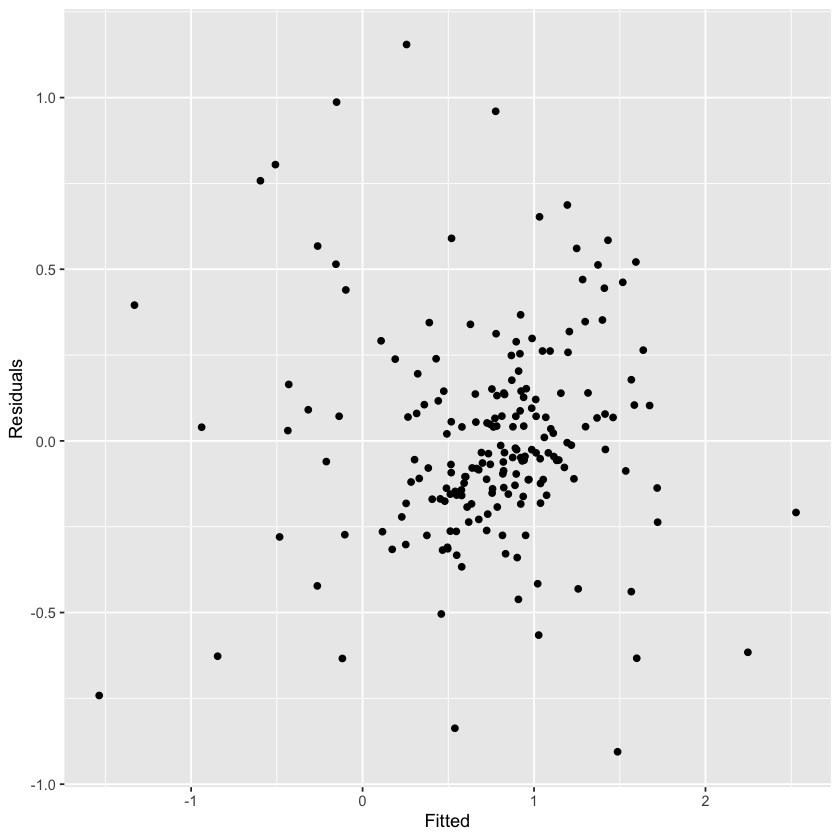

In [49]:
augment(fit_consMR) %>%
 ggplot(aes(x=.fitted, y=.resid))+
 geom_point()+
 labs(x="Fitted", y="Residuals")

- Shows the residuals plotted against the fitted values. The random scatter suggests the errors are homoscedastic.

## Spurious regression


In [50]:
fit <- aus_airpassengers %>%
  filter(Year <= 2011) %>%
  left_join(guinea_rice, by = "Year") %>%
  model(TSLM(Passengers ~ Production))
report(fit)

Series: Passengers 
Model: TSLM 

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9448 -1.8917 -0.3272  1.8620 10.4210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.493      1.203  -6.229 2.25e-07 ***
Production    40.288      1.337  30.135  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.239 on 40 degrees of freedom
Multiple R-squared: 0.9578,	Adjusted R-squared: 0.9568
F-statistic: 908.1 on 1 and 40 DF, p-value: < 2.22e-16


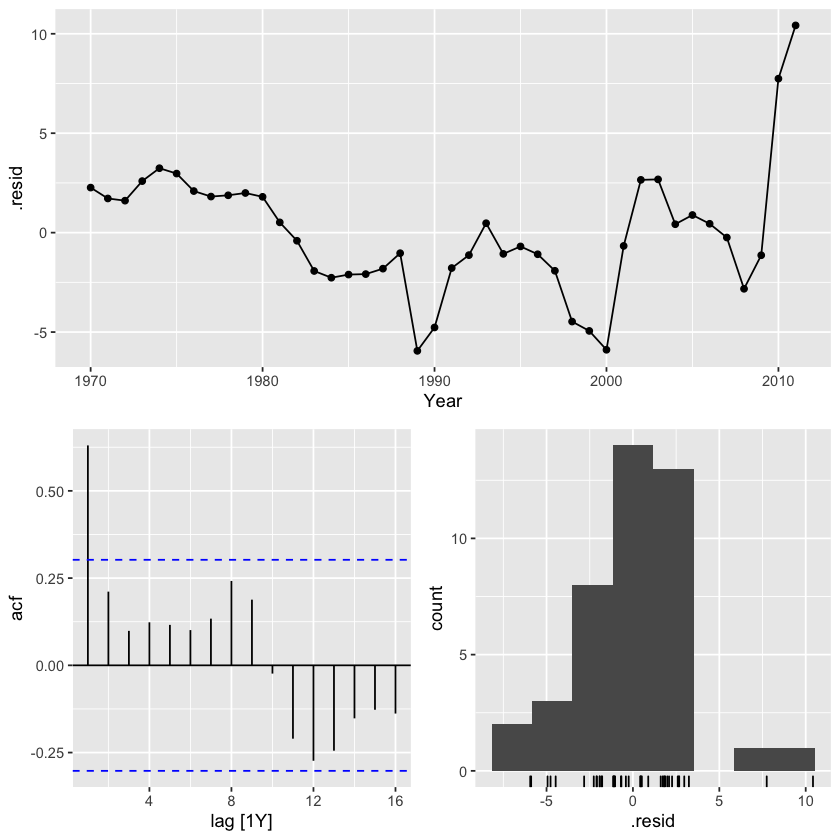

In [51]:
fit %>% gg_tsresiduals()


- High  $R^2$
  and high residual autocorrelation can be signs of spurious regression. Notice these features in the output below. 

# 4. SOME USEFUL PREDICTORS

- Trend.
- Dummy variables.
- Seasonal dummy variables.
- Fourier series.


### Example: Australian quarterly beer production

In [53]:
recent_production <- aus_production %>%
  filter(year(Quarter) >= 1992)
recent_production

Quarter Beer Tobacco Bricks Cement Electricity Gas
1  1992 Q1 443  5777    383    1289   38332       117
2  1992 Q2 410  5853    404    1501   39774       151
3  1992 Q3 420  6416    446    1539   42246       175
4  1992 Q4 532  5825    420    1568   38498       129
5  1993 Q1 433  5724    394    1450   39460       116
6  1993 Q2 421  6036    462    1668   41356       149
7  1993 Q3 410  6570    475    1648   42949       163
8  1993 Q4 512  5675    443    1863   40974       138
9  1994 Q1 449  5311    421    1468   40162       127
10 1994 Q2 381  5717    475    1755   41199       159
11 1994 Q3 423  7000    497    1962   44095       184
12 1994 Q4 531  6085    476    1833   41745       147
13 1995 Q1 426  4714    430    1626   41768       131
14 1995 Q2 408  3939    457    1703   43686       167
15 1995 Q3 416  6137    417    1733   46022       181
16 1995 Q4 520  4739    370    1545   42800       145
17 1996 Q1 409  4275    310    1526   43661       133
18 1996 Q2 398  5239    358    1593   44707       162
19 1996 Q3 398  6293    379    1706   46326       184
20 1996 Q4 507  5575    369    1699   43346       146
21 1997 Q1 432  4802    330    1511   43938       135
22 1997 Q2 398  5523    390    1785   45828       171
23 1997 Q3 406  5708    416    1826   48448       183
24 1997 Q4 526  4821    383    1830   46096       151
25 1998 Q1 428  4919    339    1719   46198       141
26 1998 Q2 397  5809    394    1861   47237       174
27 1998 Q3 403  5904    412    1956   49041       191
28 1998 Q4 517  4555    420    2067   46192       157
29 1999 Q1 435  5198    376    1737   48089       145
30 1999 Q2 383  5388    401    1944   48227       182
⋮  ⋮       ⋮    ⋮       ⋮      ⋮      ⋮           ⋮  
45 2003 Q1 435  4362    387    1831   51415       172
46 2003 Q2 380  5210    415    1892   51379       204
47 2003 Q3 421  5258    440    2227   54808       232
48 2003 Q4 490  4526    413    2090   52453       188
49 2004 Q1 435  3974    409    1963   54561       173
50 2004 Q2 390  5027    423    2180   54644       215
51 2004 Q3 412    NA    428    2307   55915       227
52 2004 Q4 454    NA    397    2157   52850       190
53 2005 Q1 416    NA    355    1980   55035       170
54 2005 Q2 403    NA    435    2481   55117       206
55 2005 Q3 408    NA     NA    2340   56043       221
56 2005 Q4 482    NA     NA    2265   54992       180
57 2006 Q1 438    NA     NA    2027   57112       171
58 2006 Q2 386    NA     NA    2278   57157       224
59 2006 Q3 405    NA     NA    2427   58400       233
60 2006 Q4 491    NA     NA    2451   56249       192
61 2007 Q1 427    NA     NA    2140   56244       187
62 2007 Q2 383    NA     NA    2362   55036       234
63 2007 Q3 394    NA     NA    2536   59806       245
64 2007 Q4 473    NA     NA    2562   56411       205
65 2008 Q1 420    NA     NA    2183   59118       194
66 2008 Q2 390    NA     NA    2558   56660       229
67 2008 Q3 410    NA     NA    2612   64067       249
68 2008 Q4 488    NA     NA    2373   59045       203
69 2009 Q1 415    NA     NA    1963   58368       196
70 2009 Q2 398    NA     NA    2160   57471       238
71 2009 Q3 419    NA     NA    2325   58394       252
72 2009 Q4 488    NA     NA    2273   57336       210
73 2010 Q1 414    NA     NA    1904   58309       205
74 2010 Q2 374    NA     NA    2401   58041       236

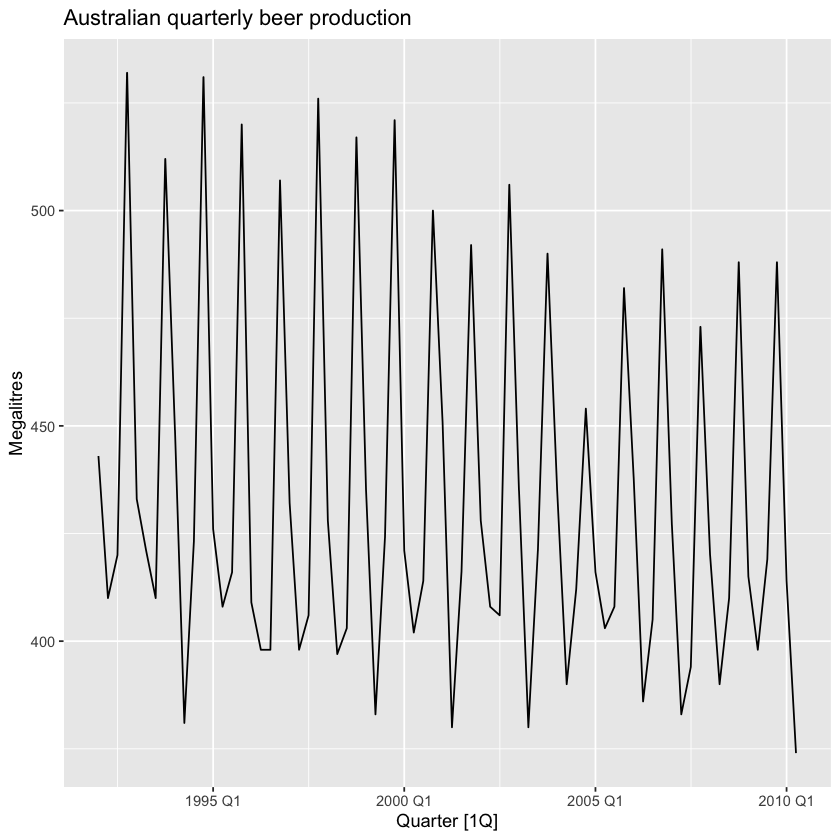

In [55]:
recent_production %>%
 autoplot(Beer) +
 labs( y="Megalitres", title="Australian quarterly beer production")

Goal: Forecast the value of future beer production using a regression model with a linear trend and quarterly dummy variables

In [57]:
fit_beer <- recent_production %>%
 model(
     TSLM(Beer ~ trend() + season())
      )
report(fit_beer)

Series: Beer 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-42.9029  -7.5995  -0.4594   7.9908  21.7895 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   441.80044    3.73353 118.333  < 2e-16 ***
trend()        -0.34027    0.06657  -5.111 2.73e-06 ***
season()year2 -34.65973    3.96832  -8.734 9.10e-13 ***
season()year3 -17.82164    4.02249  -4.430 3.45e-05 ***
season()year4  72.79641    4.02305  18.095  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared: 0.9243,	Adjusted R-squared: 0.9199
F-statistic: 210.7 on 4 and 69 DF, p-value: < 2.22e-16


- trend() and season() are not standard functions; they are “special” functions that work within the TSLM() model formulae

In [58]:
fit_beer

TSLM(Beer ~ trend() + season())
1 <TSLM>

In [59]:
augment(fit_beer)

.model                          Quarter Beer .fitted  .resid     
1  TSLM(Beer ~ trend() + season()) 1992 Q1 443  441.4602   1.5398293
2  TSLM(Beer ~ trend() + season()) 1992 Q2 410  406.4602   3.5398293
3  TSLM(Beer ~ trend() + season()) 1992 Q3 420  422.9580  -2.9579975
4  TSLM(Beer ~ trend() + season()) 1992 Q4 532  513.2358  18.7642248
5  TSLM(Beer ~ trend() + season()) 1993 Q1 433  440.0991  -7.0990991
6  TSLM(Beer ~ trend() + season()) 1993 Q2 421  405.0991  15.9009009
7  TSLM(Beer ~ trend() + season()) 1993 Q3 410  421.5969 -11.5969259
8  TSLM(Beer ~ trend() + season()) 1993 Q4 512  511.8747   0.1252963
9  TSLM(Beer ~ trend() + season()) 1994 Q1 449  438.7380  10.2619725
10 TSLM(Beer ~ trend() + season()) 1994 Q2 381  403.7380 -22.7380275
11 TSLM(Beer ~ trend() + season()) 1994 Q3 423  420.2359   2.7641457
12 TSLM(Beer ~ trend() + season()) 1994 Q4 531  510.5136  20.4863679
13 TSLM(Beer ~ trend() + season()) 1995 Q1 426  437.3770 -11.3769559
14 TSLM(Beer ~ trend() + season()) 1995 Q2 408  402.3770   5.6230441
15 TSLM(Beer ~ trend() + season()) 1995 Q3 416  418.8748  -2.8747827
16 TSLM(Beer ~ trend() + season()) 1995 Q4 520  509.1526  10.8474395
17 TSLM(Beer ~ trend() + season()) 1996 Q1 409  436.0159 -27.0158843
18 TSLM(Beer ~ trend() + season()) 1996 Q2 398  401.0159  -3.0158843
19 TSLM(Beer ~ trend() + season()) 1996 Q3 398  417.5137 -19.5137111
20 TSLM(Beer ~ trend() + season()) 1996 Q4 507  507.7915  -0.7914889
21 TSLM(Beer ~ trend() + season()) 1997 Q1 432  434.6548  -2.6548127
22 TSLM(Beer ~ trend() + season()) 1997 Q2 398  399.6548  -1.6548127
23 TSLM(Beer ~ trend() + season()) 1997 Q3 406  416.1526 -10.1526395
24 TSLM(Beer ~ trend() + season()) 1997 Q4 526  506.4304  19.5695827
25 TSLM(Beer ~ trend() + season()) 1998 Q1 428  433.2937  -5.2937411
26 TSLM(Beer ~ trend() + season()) 1998 Q2 397  398.2937  -1.2937411
27 TSLM(Beer ~ trend() + season()) 1998 Q3 403  414.7916 -11.7915679
28 TSLM(Beer ~ trend() + season()) 1998 Q4 517  505.0693  11.9306543
29 TSLM(Beer ~ trend() + season()) 1999 Q1 435  431.9327   3.0673305
30 TSLM(Beer ~ trend() + season()) 1999 Q2 383  396.9327 -13.9326695
⋮  ⋮                               ⋮       ⋮    ⋮        ⋮          
45 TSLM(Beer ~ trend() + season()) 2003 Q1 435  426.4884   8.5116169
46 TSLM(Beer ~ trend() + season()) 2003 Q2 380  391.4884 -11.4883831
47 TSLM(Beer ~ trend() + season()) 2003 Q3 421  407.9862  13.0137901
48 TSLM(Beer ~ trend() + season()) 2003 Q4 490  498.2640  -8.2639877
49 TSLM(Beer ~ trend() + season()) 2004 Q1 435  425.1273   9.8726885
50 TSLM(Beer ~ trend() + season()) 2004 Q2 390  390.1273  -0.1273115
51 TSLM(Beer ~ trend() + season()) 2004 Q3 412  406.6251   5.3748617
52 TSLM(Beer ~ trend() + season()) 2004 Q4 454  496.9029 -42.9029161
53 TSLM(Beer ~ trend() + season()) 2005 Q1 416  423.7662  -7.7662399
54 TSLM(Beer ~ trend() + season()) 2005 Q2 403  388.7662  14.2337601
55 TSLM(Beer ~ trend() + season()) 2005 Q3 408  405.2641   2.7359333
56 TSLM(Beer ~ trend() + season()) 2005 Q4 482  495.5418 -13.5418445
57 TSLM(Beer ~ trend() + season()) 2006 Q1 438  422.4052  15.5948317
58 TSLM(Beer ~ trend() + season()) 2006 Q2 386  387.4052  -1.4051683
59 TSLM(Beer ~ trend() + season()) 2006 Q3 405  403.9030   1.0970049
60 TSLM(Beer ~ trend() + season()) 2006 Q4 491  494.1808  -3.1807729
61 TSLM(Beer ~ trend() + season()) 2007 Q1 427  421.0441   5.9559033
62 TSLM(Beer ~ trend() + season()) 2007 Q2 383  386.0441  -3.0440967
63 TSLM(Beer ~ trend() + season()) 2007 Q3 394  402.5419  -8.5419235
64 TSLM(Beer ~ trend() + season()) 2007 Q4 473  492.8197 -19.8197013
65 TSLM(Beer ~ trend() + season()) 2008 Q1 420  419.6830   0.3169749
66 TSLM(Beer ~ trend() + season()) 2008 Q2 390  384.6830   5.3169749
67 TSLM(Beer ~ trend() + season()) 2008 Q3 410  401.1809   8.8191481
68 TSLM(Beer ~ trend() + season()) 2008 Q4 488  491.4586  -3.4586297
69 TSLM(Beer ~ trend() + season()) 2009 Q1 415  418.3220  -3.3219535
70 TSLM(Beer ~ trend() + season()) 2009 Q2 398  383.3220  14.6780465
7

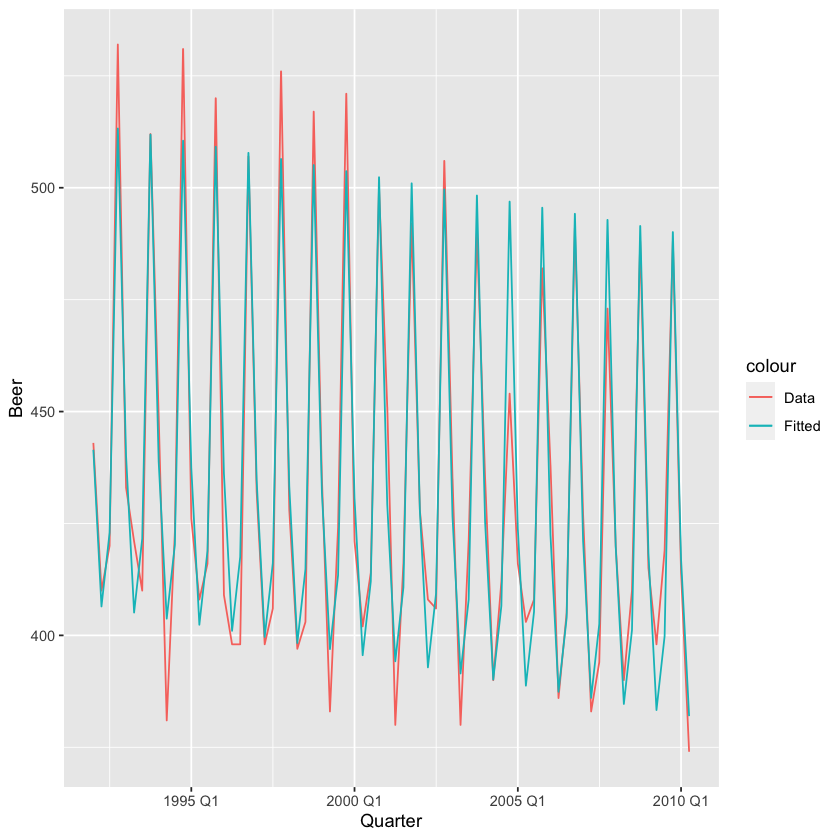

In [60]:
augment(fit_beer) %>%
 ggplot(aes(x=Quarter))+
 geom_line(aes(y=Beer, colour="Data"))+
 geom_line(aes(y=.fitted, colour="Fitted"))

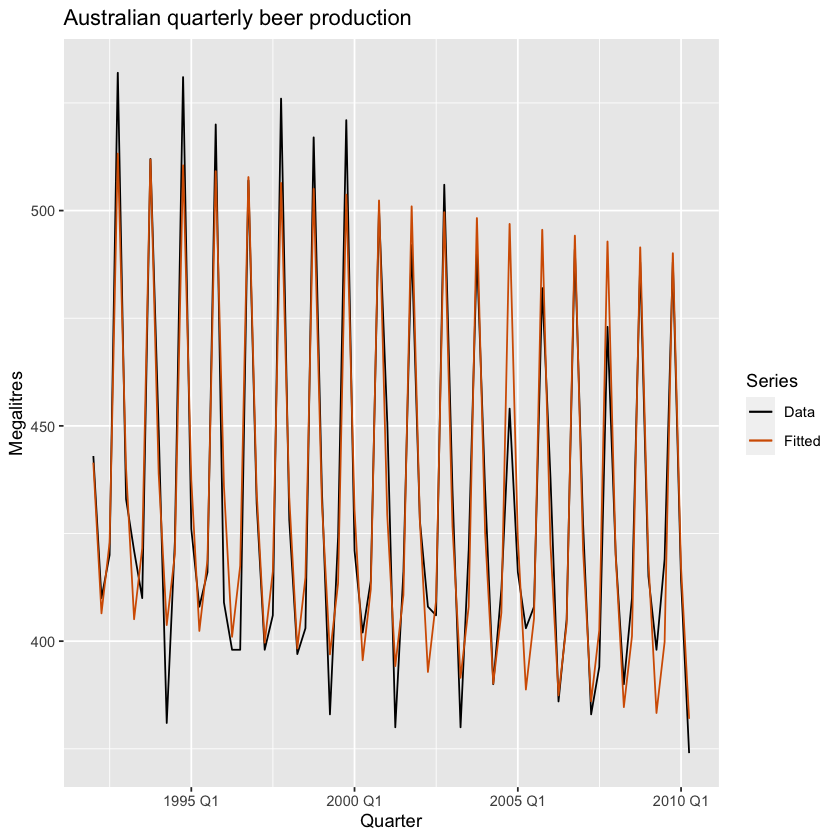

In [61]:
augment(fit_beer) %>%
 ggplot(aes(x=Quarter))+
 geom_line(aes(y=Beer, colour="Data"))+
 geom_line(aes(y=.fitted, colour="Fitted"))+
  scale_colour_manual(
    values = c(Data = "black", Fitted = "#D55E00")
  ) +
  labs(y = "Megalitres",
       title = "Australian quarterly beer production") +
  guides(colour = guide_legend(title = "Series"))

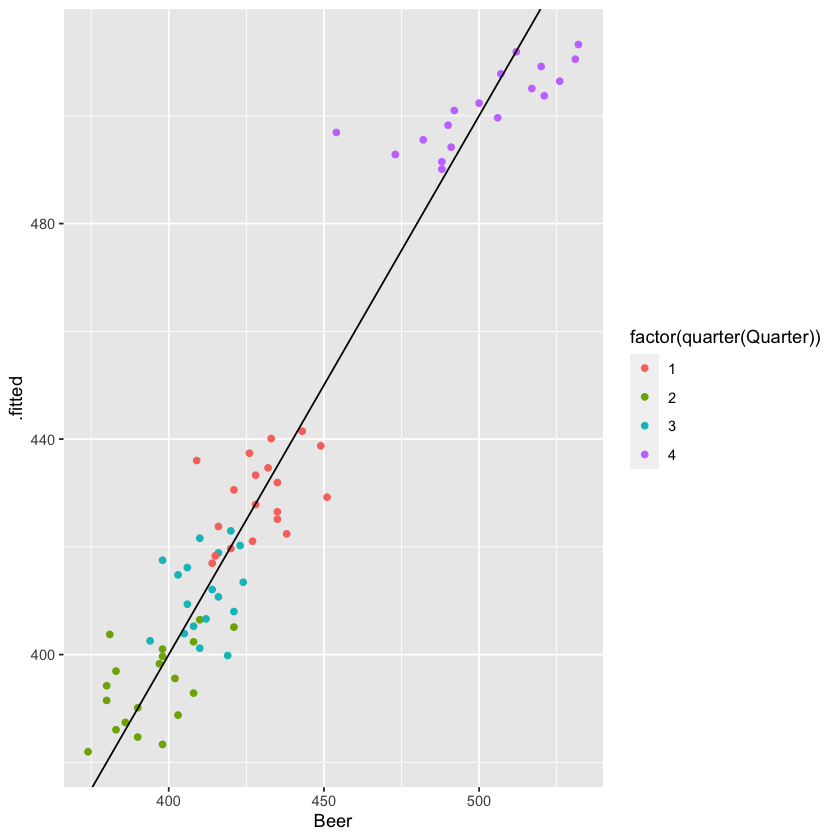

In [65]:
augment(fit_beer) %>% 
 ggplot(aes(x=Beer, y=.fitted, colour=factor(quarter(Quarter))))+
 geom_point()+
 geom_abline(intercept = 0, slope = 1)

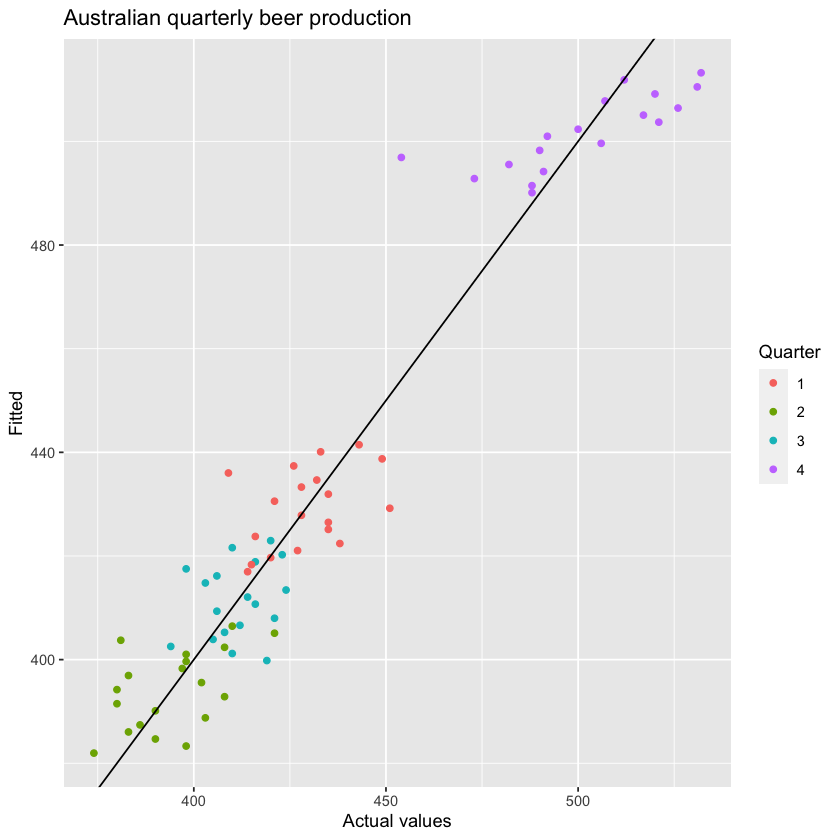

In [66]:
augment(fit_beer) %>% 
 ggplot(aes(x=Beer, y=.fitted, colour=factor(quarter(Quarter))))+
 geom_point()+
 geom_abline(intercept = 0, slope = 1)+
  labs(y = "Fitted", x = "Actual values",
       title = "Australian quarterly beer production") +
  guides(colour = guide_legend(title = "Quarter"))


### Fourier series


In [69]:
fourier_beer <- recent_production %>%
 model(
      TSLM(Beer ~ trend() + fourier(K=2))
      )

fourier_beer

TSLM(Beer ~ trend() + fourier(K = 2))
1 <TSLM>

In [70]:
report(fourier_beer)

Series: Beer 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-42.9029  -7.5995  -0.4594   7.9908  21.7895 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        446.87920    2.87321 155.533  < 2e-16 ***
trend()             -0.34027    0.06657  -5.111 2.73e-06 ***
fourier(K = 2)C1_4   8.91082    2.01125   4.430 3.45e-05 ***
fourier(K = 2)S1_4 -53.72807    2.01125 -26.714  < 2e-16 ***
fourier(K = 2)C2_4 -13.98958    1.42256  -9.834 9.26e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared: 0.9243,	Adjusted R-squared: 0.9199
F-statistic: 210.7 on 4 and 69 DF, p-value: < 2.22e-16


- The K argument to fourier() specifies how many pairs of sin and cos terms to include.
- The maximum allowed is  $K=m/2$
  where  $m$
  is the seasonal period. 
- Because we have used the maximum here, the results are identical to those obtained when using seasonal dummy variables.

Note that:
- With Fourier terms, we often need fewer predictors than with dummy variables, especially when  $m$ is large.
- This makes them useful for weekly data, for example, where  $m= 52$
- For short seasonal periods (e.g., quarterly data), there is little advantage in using Fourier terms over seasonal dummy variables.

A regression model containing Fourier terms is often called a harmonic regression because the successive Fourier terms represent harmonics of the first two Fourier terms.

# 5. SELECTING PREDICTORS

- A common approach that is not recommended is to plot the forecast variable against a particular predictor and if there is no noticeable relationship, drop that predictor from the model. 
- This is invalid because it is not always possible to see the relationship from a scatterplot, especially when the effects of other predictors have not been accounted for.

- Another common approach which is also invalid is to do a multiple linear regression on all the predictors and disregard all variables whose  $p$-values are greater than 0.05.
- To start with, statistical significance does not always indicate predictive value. Even if forecasting is not the goal, this is not a good strategy because the  
$p$- values can be misleading when two or more predictors are correlated with each other.

Instead, use a measure of predictive accuracy

In [71]:
glance(fit_consMR)

.model r_squared adj_r_squared sigma2    statistic p_value     df log_lik 
1 tslm   0.7682829 0.7634805     0.0962325 159.9781  3.92929e-60 5  -46.6599
  AIC       AICc      BIC       CV        deviance df.residual rank
1 -456.5799 -456.1401 -436.8503 0.1038972 18.57287 193         5

In [72]:
glance(fit_consMR) %>%
 select(adj_r_squared,CV, AIC, AICc, BIC)

adj_r_squared CV        AIC       AICc      BIC      
1 0.7634805     0.1038972 -456.5799 -456.1401 -436.8503

### Cross-Validation (CV):

- Time series cross-validation was introduced  as a general tool for determining the predictive ability of a model.
- For regression models, it is also possible to use classical leave-one-out cross-validation to selection predictors.
- This is faster and makes more efficient use of the data.
- https://otexts.com/fpp3/selecting-predictors.html
- Under this criterion, the best model is the one with the smallest value of CV.


NOTE:

The procedures we recommend for selecting predictors are helpful when the model is used for forecasting; they are not helpful if you wish to study the effect of any predictor on the forecast variable.

# 6. Forecasting with regression

## Example: Australian quarterly beer production


In [75]:
recent_production <- aus_production %>%
  filter(year(Quarter) >= 1992)

recent_production

Quarter Beer Tobacco Bricks Cement Electricity Gas
1  1992 Q1 443  5777    383    1289   38332       117
2  1992 Q2 410  5853    404    1501   39774       151
3  1992 Q3 420  6416    446    1539   42246       175
4  1992 Q4 532  5825    420    1568   38498       129
5  1993 Q1 433  5724    394    1450   39460       116
6  1993 Q2 421  6036    462    1668   41356       149
7  1993 Q3 410  6570    475    1648   42949       163
8  1993 Q4 512  5675    443    1863   40974       138
9  1994 Q1 449  5311    421    1468   40162       127
10 1994 Q2 381  5717    475    1755   41199       159
11 1994 Q3 423  7000    497    1962   44095       184
12 1994 Q4 531  6085    476    1833   41745       147
13 1995 Q1 426  4714    430    1626   41768       131
14 1995 Q2 408  3939    457    1703   43686       167
15 1995 Q3 416  6137    417    1733   46022       181
16 1995 Q4 520  4739    370    1545   42800       145
17 1996 Q1 409  4275    310    1526   43661       133
18 1996 Q2 398  5239    358    1593   44707       162
19 1996 Q3 398  6293    379    1706   46326       184
20 1996 Q4 507  5575    369    1699   43346       146
21 1997 Q1 432  4802    330    1511   43938       135
22 1997 Q2 398  5523    390    1785   45828       171
23 1997 Q3 406  5708    416    1826   48448       183
24 1997 Q4 526  4821    383    1830   46096       151
25 1998 Q1 428  4919    339    1719   46198       141
26 1998 Q2 397  5809    394    1861   47237       174
27 1998 Q3 403  5904    412    1956   49041       191
28 1998 Q4 517  4555    420    2067   46192       157
29 1999 Q1 435  5198    376    1737   48089       145
30 1999 Q2 383  5388    401    1944   48227       182
⋮  ⋮       ⋮    ⋮       ⋮      ⋮      ⋮           ⋮  
45 2003 Q1 435  4362    387    1831   51415       172
46 2003 Q2 380  5210    415    1892   51379       204
47 2003 Q3 421  5258    440    2227   54808       232
48 2003 Q4 490  4526    413    2090   52453       188
49 2004 Q1 435  3974    409    1963   54561       173
50 2004 Q2 390  5027    423    2180   54644       215
51 2004 Q3 412    NA    428    2307   55915       227
52 2004 Q4 454    NA    397    2157   52850       190
53 2005 Q1 416    NA    355    1980   55035       170
54 2005 Q2 403    NA    435    2481   55117       206
55 2005 Q3 408    NA     NA    2340   56043       221
56 2005 Q4 482    NA     NA    2265   54992       180
57 2006 Q1 438    NA     NA    2027   57112       171
58 2006 Q2 386    NA     NA    2278   57157       224
59 2006 Q3 405    NA     NA    2427   58400       233
60 2006 Q4 491    NA     NA    2451   56249       192
61 2007 Q1 427    NA     NA    2140   56244       187
62 2007 Q2 383    NA     NA    2362   55036       234
63 2007 Q3 394    NA     NA    2536   59806       245
64 2007 Q4 473    NA     NA    2562   56411       205
65 2008 Q1 420    NA     NA    2183   59118       194
66 2008 Q2 390    NA     NA    2558   56660       229
67 2008 Q3 410    NA     NA    2612   64067       249
68 2008 Q4 488    NA     NA    2373   59045       203
69 2009 Q1 415    NA     NA    1963   58368       196
70 2009 Q2 398    NA     NA    2160   57471       238
71 2009 Q3 419    NA     NA    2325   58394       252
72 2009 Q4 488    NA     NA    2273   57336       210
73 2010 Q1 414    NA     NA    1904   58309       205
74 2010 Q2 374    NA     NA    2401   58041       236

In [76]:
fit_beer <- recent_production %>%
  model(TSLM(Beer ~ trend() + season()))

fit_beer

TSLM(Beer ~ trend() + season())
1 <TSLM>

In [79]:
fc_beer <- forecast(fit_beer)
fc_beer

.model                          Quarter Beer        .mean   
1 TSLM(Beer ~ trend() + season()) 2010 Q3 N(398, 164) 398.4587
2 TSLM(Beer ~ trend() + season()) 2010 Q4 N(489, 164) 488.7365
3 TSLM(Beer ~ trend() + season()) 2011 Q1 N(416, 165) 415.5998
4 TSLM(Beer ~ trend() + season()) 2011 Q2 N(381, 165) 380.5998
5 TSLM(Beer ~ trend() + season()) 2011 Q3 N(397, 166) 397.0976
6 TSLM(Beer ~ trend() + season()) 2011 Q4 N(487, 166) 487.3754
7 TSLM(Beer ~ trend() + season()) 2012 Q1 N(414, 166) 414.2387
8 TSLM(Beer ~ trend() + season()) 2012 Q2 N(379, 166) 379.2387

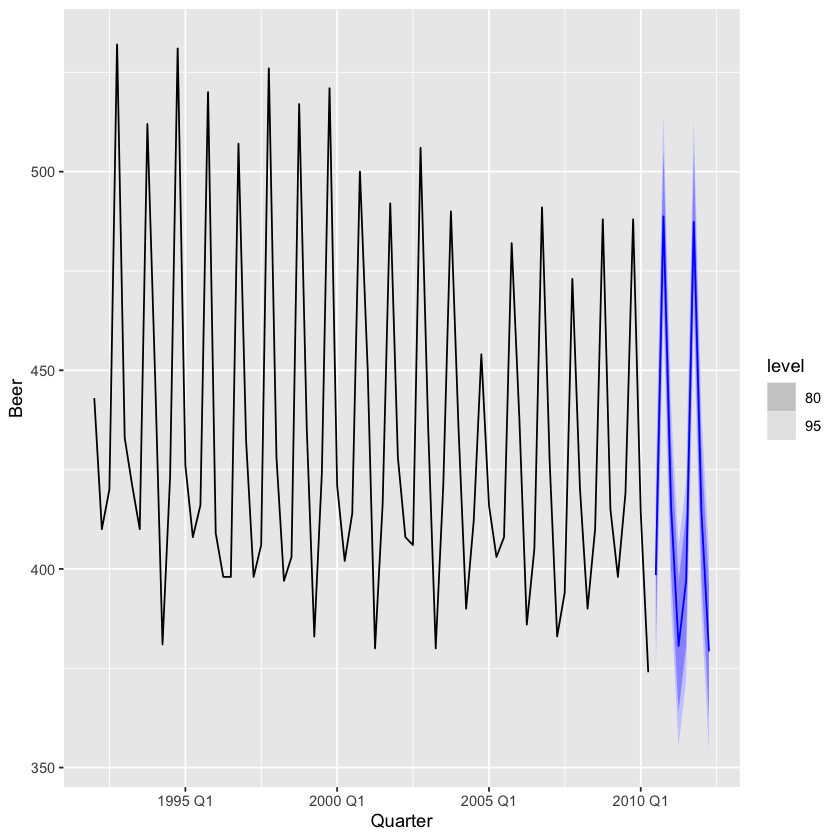

In [80]:
fc_beer %>%
  autoplot(recent_production)

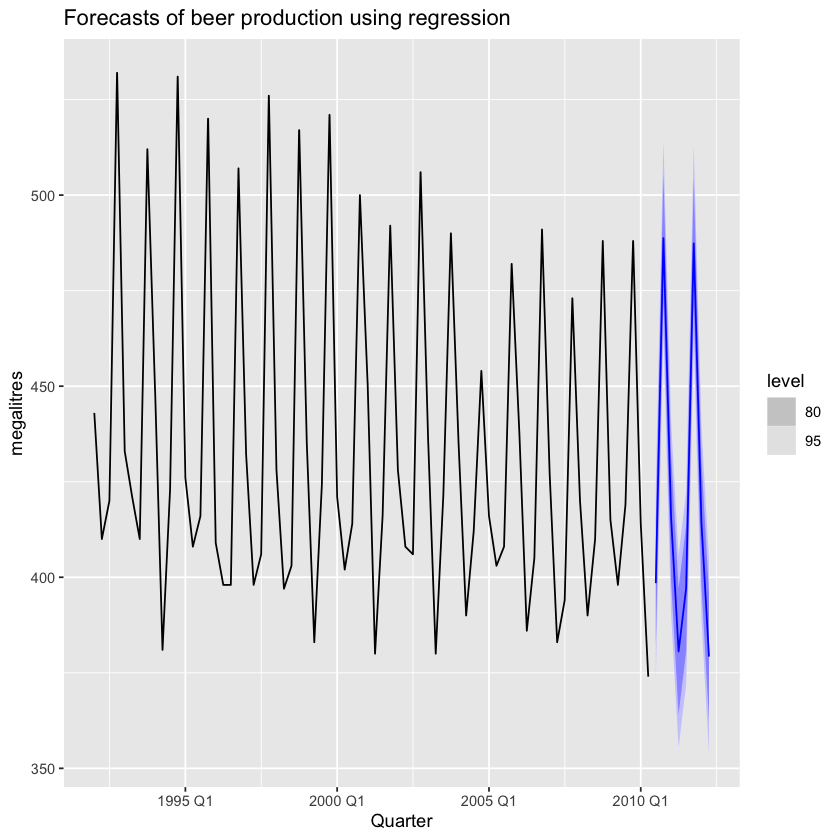

In [81]:
fc_beer %>%
  autoplot(recent_production) +
  labs(
    title = "Forecasts of beer production using regression",
    y = "megalitres"
  )

 # Scenario based forecasting


In [84]:
fit_consBest<- us_change %>%
 model(
     lm=TSLM(Consumption ~ Income+ Savings+ Unemployment)
      )
fit_consBest

lm    
1 <TSLM>

- scenarios() is a function in R.

we want:
- scenario 1: constant growth of 1% and 0.5% respectively for income and savings with no change in the employment rate.
- scenario 2: a respective decline of 1% and 0.5%, for each of the four quarters following the end of the sample

In [88]:
future_scenarios <- scenarios(
  Increase=new_data(us_change , 4) %>% mutate(Income=1 ,Savings= 0.5, Unemployment=0),
  Decrease=new_data(us_change , 4) %>% mutate(Income=-1,Savings=-0.5, Unemployment=0),
  names_to ="Scenario"  
                             )

In [89]:
future_scenarios

$Increase
# A tsibble: 4 x 4 [1Q]
  Quarter Income Savings Unemployment
    <qtr>  <dbl>   <dbl>        <dbl>
1 2019 Q3      1     0.5            0
2 2019 Q4      1     0.5            0
3 2020 Q1      1     0.5            0
4 2020 Q2      1     0.5            0

$Decrease
# A tsibble: 4 x 4 [1Q]
  Quarter Income Savings Unemployment
    <qtr>  <dbl>   <dbl>        <dbl>
1 2019 Q3     -1    -0.5            0
2 2019 Q4     -1    -0.5            0
3 2020 Q1     -1    -0.5            0
4 2020 Q2     -1    -0.5            0

attr(,"names_to")
[1] "Scenario"

In [90]:
fc<-forecast(fit_consBest, new_data=future_scenarios)

In [91]:
fc

Scenario .model Quarter Consumption   .mean      Income Savings Unemployment
1 Increase lm     2019 Q3 N(1, 0.098)    0.9964352  1      0.5    0           
2 Increase lm     2019 Q4 N(1, 0.098)    0.9964352  1      0.5    0           
3 Increase lm     2020 Q1 N(1, 0.098)    0.9964352  1      0.5    0           
4 Increase lm     2020 Q2 N(1, 0.098)    0.9964352  1      0.5    0           
5 Decrease lm     2019 Q3 N(-0.46, 0.1) -0.4636629 -1     -0.5    0           
6 Decrease lm     2019 Q4 N(-0.46, 0.1) -0.4636629 -1     -0.5    0           
7 Decrease lm     2020 Q1 N(-0.46, 0.1) -0.4636629 -1     -0.5    0           
8 Decrease lm     2020 Q2 N(-0.46, 0.1) -0.4636629 -1     -0.5    0

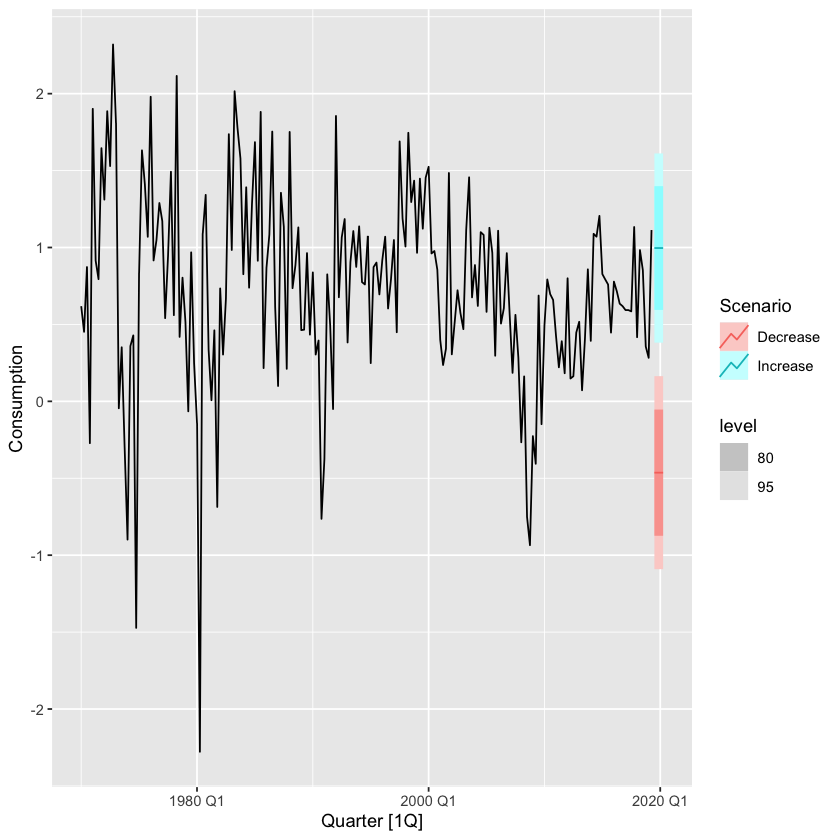

In [92]:
us_change %>%
 autoplot(Consumption)+
 autolayer(fc)

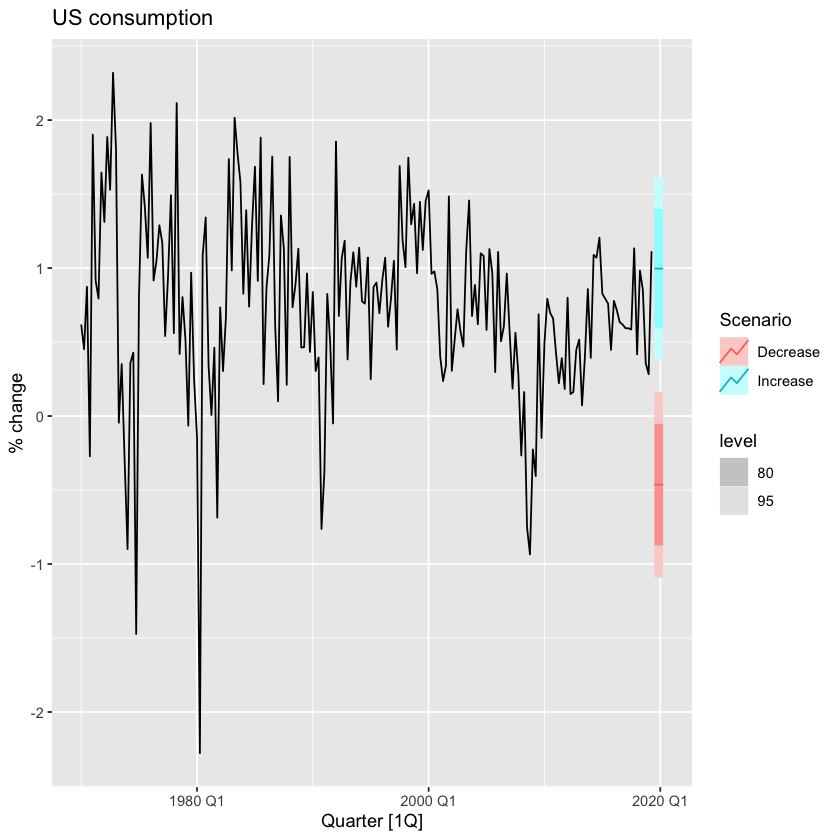

In [93]:
us_change %>%
  autoplot(Consumption) +
  autolayer(fc) +
  labs(title = "US consumption", y = "% change")

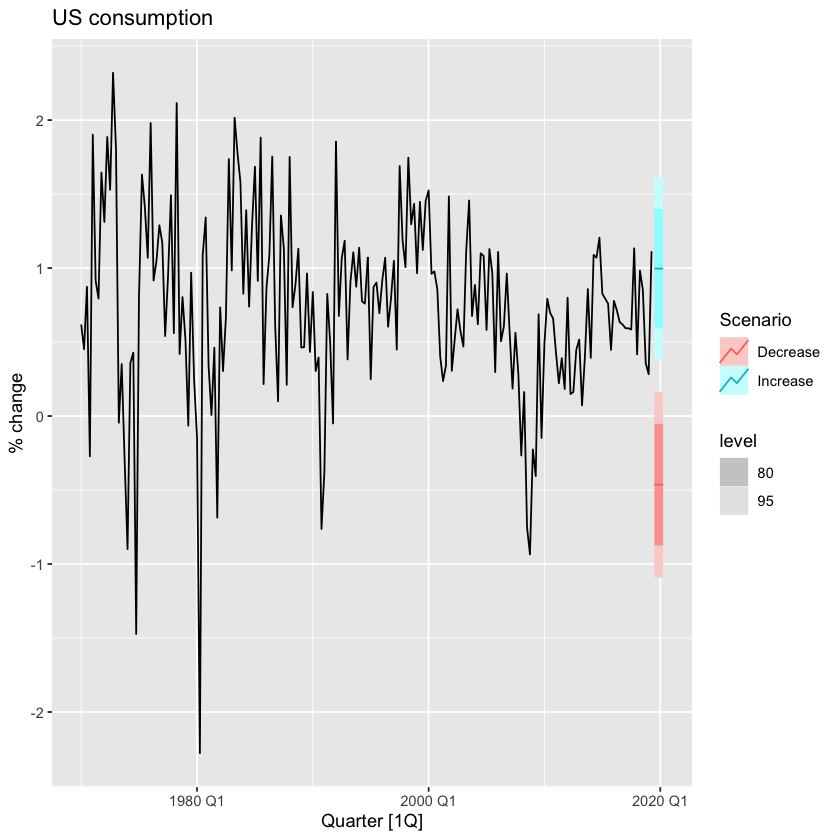

In [94]:
fit_consBest <- us_change %>%
  model(
    lm = TSLM(Consumption ~ Income + Savings + Unemployment)
  )
future_scenarios <- scenarios(
  Increase = new_data(us_change, 4) %>%
    mutate(Income=1, Savings=0.5, Unemployment=0),
  Decrease = new_data(us_change, 4) %>%
    mutate(Income=-1, Savings=-0.5, Unemployment=0),
  names_to = "Scenario")

fc <- forecast(fit_consBest, future_scenarios) # the only difference
us_change %>%
  autoplot(Consumption) +
  autolayer(fc) +
  labs(title = "US consumption", y = "% change")

Example 2:

- Assuming that for the next four quarters, personal income will increase by its historical mean value of  $\bar{x}=0.73 \%$


In [98]:
us_change

Quarter Consumption Income     Production  Savings      Unemployment
1   1970 Q1  0.61856640  1.0448013 -2.45248553   5.2990141   0.9        
2   1970 Q2  0.45198402  1.2256472 -0.55145947   7.7898938   0.5        
3   1970 Q3  0.87287178  1.5851538 -0.35865175   7.4039841   0.5        
4   1970 Q4 -0.27184793 -0.2395449 -2.18569087   1.1698982   0.7        
5   1971 Q1  1.90134496  1.9759249  1.90976436   3.5356669  -0.1        
6   1971 Q2  0.91487735  1.4459085  0.90156952   5.8747636  -0.1        
7   1971 Q3  0.79410964  0.5211491  0.30803071  -0.4062353   0.1        
8   1971 Q4  1.64563316  1.1591761  2.29136214  -1.4862589   0.0        
9   1972 Q1  1.31118969  0.4568567  4.15429495  -4.2919722  -0.2        
10  1972 Q2  1.88577788  1.0333893  1.88867271  -4.6921964  -0.1        
11  1972 Q3  1.52933361  1.9262949  1.26541145   5.9234540  -0.2        
12  1972 Q4  2.31955754  3.9299492  3.43958747  16.0735141  -0.3        
13  1973 Q1  1.80928217  0.7556427  2.79414525  -4.7589832  -0.3        
14  1973 Q2 -0.04509061  0.8403923  0.83217448   8.6151011   0.0        
15  1973 Q3  0.35135318  0.4510266  0.85862449   2.9480635  -0.1        
16  1973 Q4 -0.29869339  1.0881608  1.48200795  10.8349639   0.1        
17  1974 Q1 -0.89869876 -1.6741912 -0.88609656  -2.3625108   0.2        
18  1974 Q2  0.35940645 -0.9344403  0.05894791  -6.3018544   0.3        
19  1974 Q3  0.42864101  0.0903256 -0.39493018   0.4466351   0.5        
20  1974 Q4 -1.47250253 -0.1336754 -4.05070223  10.9899284   1.3        
21  1975 Q1  0.83524738 -0.1505418 -6.83603945  -5.1770838   1.4        
22  1975 Q2  1.63148743  4.5218688 -1.35939960  23.7392807   0.2        
23  1975 Q3  1.41124035 -1.4643423  2.42591788 -17.0840985  -0.4        
24  1975 Q4  1.06959158  0.7786936  2.15784549   0.7937147  -0.2        
25  1976 Q1  1.97965950  1.2003233  3.02870765  -2.4194882  -0.6        
26  1976 Q2  0.91584535  0.5663527  1.26991500  -0.9726696   0.0        
27  1976 Q3  1.04735216  0.7771957  1.32796180   0.3939361   0.0        
28  1976 Q4  1.28914016  0.6324554  1.78768419  -2.8542505   0.2        
29  1977 Q1  1.17179885  0.2244761  2.05356944  -6.2734816  -0.4        
30  1977 Q2  0.54078143  0.9355104  3.05148479   5.8395263  -0.2        
⋮   ⋮       ⋮           ⋮          ⋮           ⋮            ⋮           
169 2012 Q1 0.7997592    1.8546191  0.94854995  15.64792838 -0.3        
170 2012 Q2 0.1482683    0.9050116  0.63447000   9.20564881  0.0        
171 2012 Q3 0.1630397   -0.7184021  0.01019725  -9.28944189 -0.4        
172 2012 Q4 0.4471923    2.7326089  0.52306130  26.00101854  0.1        
173 2013 Q1 0.5171984   -4.0844195  0.77969494 -56.47190972 -0.4        
174 2013 Q2 0.0719452    0.7422486  0.42909942  10.75860987  0.0        
175 2013 Q3 0.4059027    0.4314045  0.35611641   1.58427629 -0.3        
176 2013 Q4 0.8579759    0.3943067  0.68210300  -5.78260692 -0.5        
177 2014 Q1 0.3931571    1.3833211  0.76735762  14.62587433  0.0        
178 2014 Q2 1.0889537    1.3529276  1.32862991   5.25332235 -0.6        
179 2014 Q3 1.0702826    1.1605783  0.59108852   2.17927500 -0.2        
180 2014 Q4 1.2054266    1.3130115  0.65403062   1.72020988 -0.3        
181 2015 Q1 0.8272678    1.1292929 -0.76730655   4.01969762 -0.2        
182 2015 Q2 0.7928127    0.7495874 -1.35183543   0.33456221 -0.1        
183 2015 Q3 0.7594273    0.7323707 -0.01777189   0.49577940 -0.3        
184 2015 Q4 0.4468239    0.3167496 -1.31442273  -1.69949104  0.0        
185 2016 Q1 0.7782543    0.6661374 -0.51892196  -0.07568514  0.0        
186 2016 Q2 0.7155914   -0.1065885 -0.57869515  -9.38621669 -0.1        
187 2016 Q3 0.6349156    0.4472701  0.45807071  -2.09617211  0.1        
188 2016 Q4 0.6185453    0.5980377  0.32814541   0.10885389 -0.3        
189 2017 Q1 0.5933365    1.1920316  0.58427288  10.17889613 -0.3        
190 2017 Q2 0.5931534    0.6648103  1.36345260   0.78382422 -0.1        
191 2017 Q3 0.5847379    0.5797157 -0.20111512   0.47774011 -0

In [95]:
fit_cons <- us_change %>%
  model(TSLM(Consumption ~ Income))

In [96]:
fit_cons

TSLM(Consumption ~ Income)
1 <TSLM>

In [102]:
new_cons <- scenarios(
  "Average increase" = new_data(us_change, 4) %>%
    mutate(Income = mean(us_change$Income)),
  "Extreme increase" = new_data(us_change, 4) %>%
    mutate(Income = 12),
  names_to = "Scenario"
)

new_cons

$`Average increase`
# A tsibble: 4 x 2 [1Q]
  Quarter Income
    <qtr>  <dbl>
1 2019 Q3  0.728
2 2019 Q4  0.728
3 2020 Q1  0.728
4 2020 Q2  0.728

$`Extreme increase`
# A tsibble: 4 x 2 [1Q]
  Quarter Income
    <qtr>  <dbl>
1 2019 Q3     12
2 2019 Q4     12
3 2020 Q1     12
4 2020 Q2     12

attr(,"names_to")
[1] "Scenario"

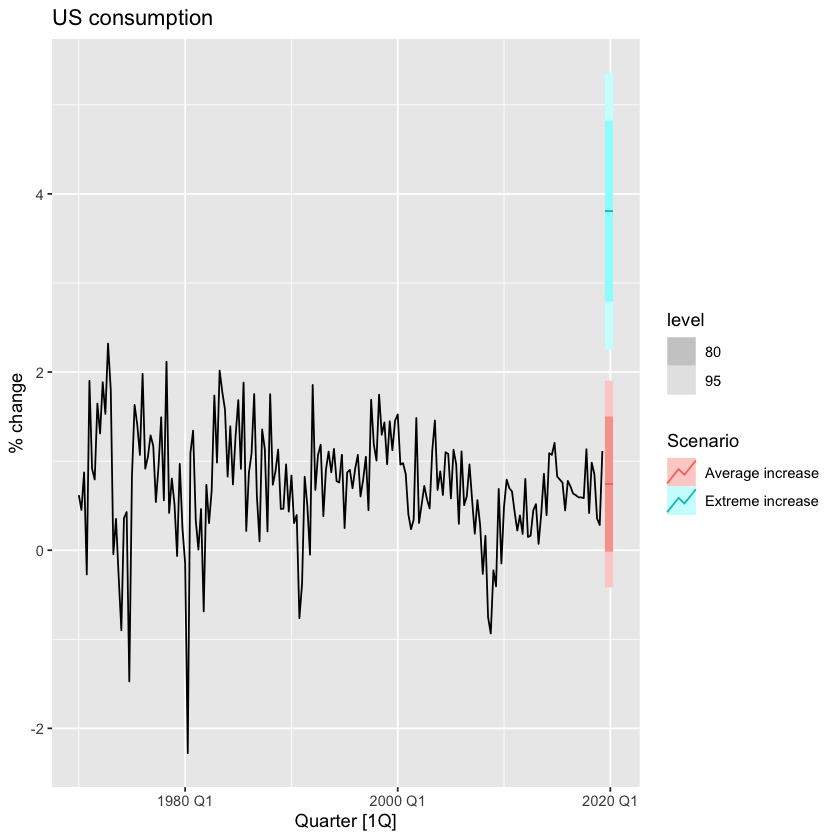

In [103]:
fcast <- forecast(fit_cons, new_cons)

us_change %>%
  autoplot(Consumption) +
  autolayer(fcast) +
  labs(title = "US consumption", y = "% change")

Prediction intervals if income is increased by its historical mean of  
0.73% versus an extreme increase of 12

# 7. Nonlinear regression

In [106]:
boston_marathon

Event               Year Champion                    Country      
1   Men's open division 1897 John J. McDermott           United States
2   Men's open division 1898 Ronald J. MacDonald         Canada       
3   Men's open division 1899 Lawrence Brignolia          United States
4   Men's open division 1900 John P. Caffery             Canada       
5   Men's open division 1901 John P. Caffery             Canada       
6   Men's open division 1902 Sammy A. Mellor             United States
7   Men's open division 1903 John C. Lorden              United States
8   Men's open division 1904 Michael Spring              United States
9   Men's open division 1905 Frederick Lorz              United States
10  Men's open division 1906 Timothy Ford                United States
11  Men's open division 1907 Thomas Longboat             Canada       
12  Men's open division 1908 Thomas P. Morrissey         United States
13  Men's open division 1909 Henri Renaud                United States
14  Men's open division 1910 Fred L. Cameron             Canada       
15  Men's open division 1911 Clarence H. DeMar           United States
16  Men's open division 1912 Michael J. Ryan             United States
17  Men's open division 1913 Fritz Carlson               United States
18  Men's open division 1914 James Duffy                 Canada       
19  Men's open division 1915 Edouard Fabre               Canada       
20  Men's open division 1916 Arthur V. Roth              United States
21  Men's open division 1917 William J. (Bill) Kennedy   United States
22  Men's open division 1918 Camp Devens Divisional Team United States
23  Men's open division 1919 Carl W. A. Linder           United States
24  Men's open division 1920 Peter Trivoulidas           Greece       
25  Men's open division 1921 Frank T. Zuna               United States
26  Men's open division 1922 Clarence H. DeMar           United States
27  Men's open division 1923 Clarence H. DeMar           United States
28  Men's open division 1924 Clarence H. DeMar           United States
29  Men's open division 1925 Charles L. (Chuck) Mellor   United States
30  Men's open division 1926 John C. Miles               Canada       
⋮   ⋮                   ⋮    ⋮                           ⋮            
236 Women's wheelchair  1990 Jean Driscoll               United States
237 Women's wheelchair  1991 Jean Driscoll               United States
238 Women's wheelchair  1992 Jean Driscoll               United States
239 Women's wheelchair  1993 Jean Driscoll               United States
240 Women's wheelchair  1994 Jean Driscoll               United States
241 Women's wheelchair  1995 Jean Driscoll               United States
242 Women's wheelchair  1996 Jean Driscoll               United States
243 Women's wheelchair  1997 Louise Sauvage              Australia    
244 Women's wheelchair  1998 Louise Sauvage              Australia    
245 Women's wheelchair  1999 Louise Sauvage              Australia    
246 Women's wheelchair  2000 Jean Driscoll               United States
247 Women's wheelchair  2001 Louise Sauvage              Australia    
248 Women's wheelchair  2002 Edith Hunkeler              Switzerland  
249 Women's wheelchair  2003 Christina Ripp              United States
250 Women's wheelchair  2004 Cheri Blauwet               United States
251 Women's wheelchair  2005 Cheri Blauwet               United States
252 Women's wheelchair  2006 Edith Hunkeler              Switzerland  
253 Women's wheelchair  2007 Wakako Tsuchida             Japan        
254 Women's wheelchair  2008 Wakako Tsuchida             Japan        
255 Women's wheelchair  2009 Wakako Tsuchida             Japan        
256 Women's wheelchair  2010 Wakako Tsuchida             Japan        
257 Women's wheelchair  2011 Wakako Tsuchida             Japan        
258 Women's wheelchair  2012 Shirley Reilly              United States
259 Women's wheelchair  2013 Tatyana McFadden            United States
260 Women's wheelchair  2014

In [105]:
boston_men <- boston_marathon %>%
  filter(Year >= 1924) %>%
  filter(Event == "Men's open division") %>%
  mutate(Minutes = as.numeric(Time)/60)

boston_men

Event               Year Champion                   Country       Time      
1  Men's open division 1924 Clarence H. DeMar          United States  8980 secs
2  Men's open division 1925 Charles L. (Chuck) Mellor  United States  9180 secs
3  Men's open division 1926 John C. Miles              Canada         8740 secs
4  Men's open division 1927 Clarence H. DeMar          United States  9622 secs
5  Men's open division 1928 Clarence H. DeMar          United States  9427 secs
6  Men's open division 1929 John C. Miles              Canada         9188 secs
7  Men's open division 1930 Clarence H. DeMar          United States  9288 secs
8  Men's open division 1931 James P. Henigan           United States 10005 secs
9  Men's open division 1932 Paul de Bruyn              Germany        9216 secs
10 Men's open division 1933 Leslie S. Pawson           United States  9061 secs
11 Men's open division 1934 Dave Komonen               Canada         9173 secs
12 Men's open division 1935 John A. Kelley             United States  9127 secs
13 Men's open division 1936 Ellison M. Brown           United States  9220 secs
14 Men's open division 1937 Walter Young               Canada         9200 secs
15 Men's open division 1938 Leslie S. Pawson           United States  9334 secs
16 Men's open division 1939 Ellison M. Brown           United States  8931 secs
17 Men's open division 1940 Gerard Cote                Canada         8908 secs
18 Men's open division 1941 Leslie S. Pawson           United States  9038 secs
19 Men's open division 1942 Bernard Joseph (Joe) Smith United States  8811 secs
20 Men's open division 1943 Gerard Cote                Canada         8905 secs
21 Men's open division 1944 Gerard Cote                Canada         9110 secs
22 Men's open division 1945 John A. Kelley             United States  9040 secs
23 Men's open division 1946 Stylianos Kyriakides       Greece         8967 secs
24 Men's open division 1947 Yun Bok Suh                Korea          8739 secs
25 Men's open division 1948 Gerard Cote                Canada         9062 secs
26 Men's open division 1949 Karl Gosta Leandersson     Sweden         9110 secs
27 Men's open division 1950 Ki-Yong Ham                Korea          9159 secs
28 Men's open division 1951 Shigeki Tanaka             Japan          8865 secs
29 Men's open division 1952 Doroteo Flores             Guatemala      9113 secs
30 Men's open division 1953 Keizo Yamada               Japan          8331 secs
⋮  ⋮                   ⋮    ⋮                          ⋮             ⋮         
67 Men's open division 1990 Gelindo Bordin             Italy         7699 secs 
68 Men's open division 1991 Ibrahim Hussein            Kenya         7866 secs 
69 Men's open division 1992 Ibrahim Hussein            Kenya         7694 secs 
70 Men's open division 1993 Cosmas Ndeti               Kenya         7773 secs 
71 Men's open division 1994 Cosmas Ndeti               Kenya         7635 secs 
72 Men's open division 1995 Cosmas Ndeti               Kenya         7762 secs 
73 Men's open division 1996 Moses Tanui                Kenya         7755 secs 
74 Men's open division 1997 Lameck Aguta               Kenya         7834 secs 
75 Men's open division 1998 Moses Tanui                Kenya         7654 secs 
76 Men's open division 1999 Joseph Chebet              Kenya         7792 secs 
77 Men's open division 2000 Elijah Lagat               Kenya         7787 secs 
78 Men's open division 2001 Lee Bong-Ju                South Korea   7783 secs 
79 Men's open division 2002 Rodgers Rop                Kenya         7742 secs 
80 Men's open division 2003 Robert Kipkoech Cheruiyot  Kenya         7811 secs 
81 Men's open division 2004 Timothy Cherigat           Kenya         7837 secs 
82 Men's open division 2005 Hailu Negussie             Ethiopia      7905 secs 
83 Men's open division 2006 Robert Kipkoech Cheruiyot  Kenya         7634 secs 
84 Men's open division 2007 Robert Kipkoech Cheruiyot  Kenya         8053 secs 
85 

In [112]:
fit_trends <- boston_men %>%
  model(
    linear      = TSLM(Minutes ~ trend()),                     # trend
    exponential = TSLM(log(Minutes) ~ trend()),                # exponential trend
    piecewise   = TSLM(Minutes ~ trend(knots = c(1950, 1980))) # piecewise specification
  )

fit_trends

Event               linear exponential piecewise
1 Men's open division <TSLM> <TSLM>      <TSLM>

In [110]:
fc_trends <- fit_trends %>% forecast(h = 10)

fc_trends

Event               .model      Year Minutes           .mean   
1  Men's open division linear      2020 N(123, 22)        122.9582
2  Men's open division linear      2021 N(123, 22)        122.6349
3  Men's open division linear      2022 N(122, 22)        122.3116
4  Men's open division linear      2023 N(122, 22)        121.9882
5  Men's open division linear      2024 N(122, 22)        121.6649
6  Men's open division linear      2025 N(121, 22)        121.3416
7  Men's open division linear      2026 N(121, 22)        121.0183
8  Men's open division linear      2027 N(121, 22)        120.6949
9  Men's open division linear      2028 N(120, 22)        120.3716
10 Men's open division linear      2029 N(120, 22)        120.0483
11 Men's open division exponential 2020 t(N(4.8, 0.0011)) 123.7473
12 Men's open division exponential 2021 t(N(4.8, 0.0011)) 123.4630
13 Men's open division exponential 2022 t(N(4.8, 0.0011)) 123.1793
14 Men's open division exponential 2023 t(N(4.8, 0.0011)) 122.8962
15 Men's open division exponential 2024 t(N(4.8, 0.0011)) 122.6138
16 Men's open division exponential 2025 t(N(4.8, 0.0011)) 122.3321
17 Men's open division exponential 2026 t(N(4.8, 0.0011)) 122.0510
18 Men's open division exponential 2027 t(N(4.8, 0.0011)) 121.7706
19 Men's open division exponential 2028 t(N(4.8, 0.0011)) 121.4908
20 Men's open division exponential 2029 t(N(4.8, 0.0011)) 121.2116
21 Men's open division piecewise   2020 N(130, 13)        129.5195
22 Men's open division piecewise   2021 N(130, 13)        129.5069
23 Men's open division piecewise   2022 N(129, 14)        129.4942
24 Men's open division piecewise   2023 N(129, 14)        129.4816
25 Men's open division piecewise   2024 N(129, 14)        129.4690
26 Men's open division piecewise   2025 N(129, 14)        129.4564
27 Men's open division piecewise   2026 N(129, 14)        129.4437
28 Men's open division piecewise   2027 N(129, 14)        129.4311
29 Men's open division piecewise   2028 N(129, 14)        129.4185
30 Men's open division piecewise   2029 N(129, 14)        129.4059

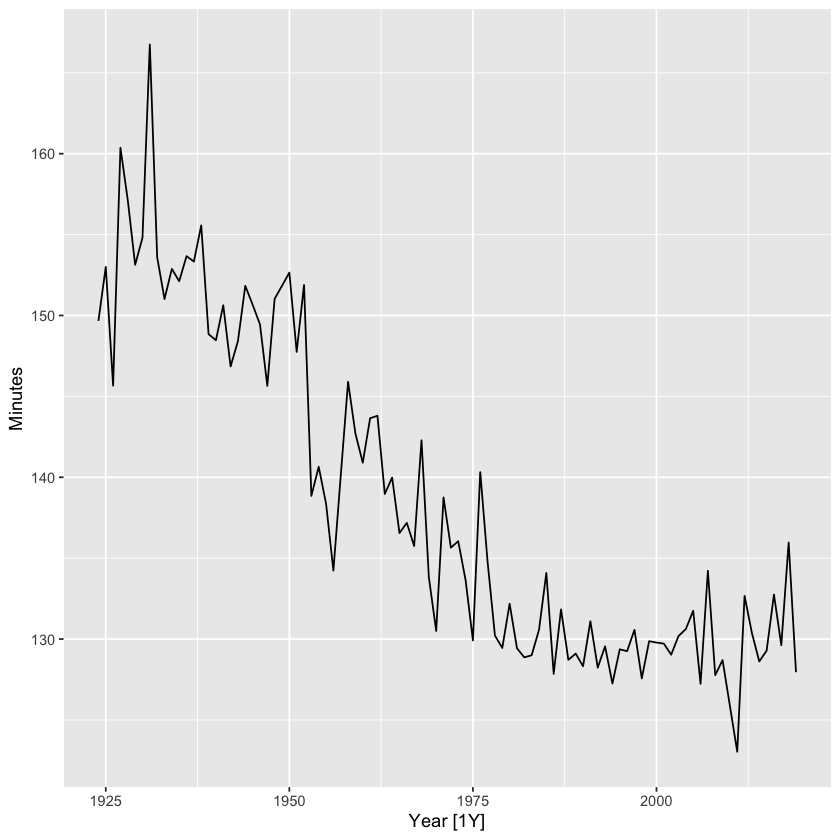

In [114]:
boston_men %>%
  autoplot(Minutes) 


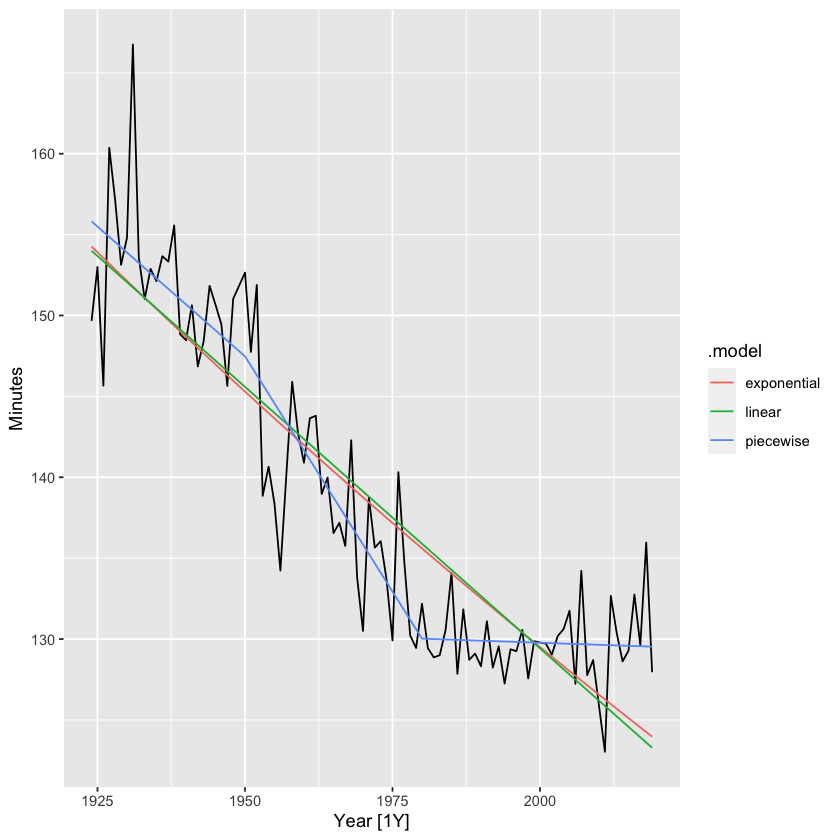

In [115]:
  boston_men %>%
  autoplot(Minutes) +
 geom_line(data = fitted(fit_trends),
            aes(y = .fitted, colour = .model)) 

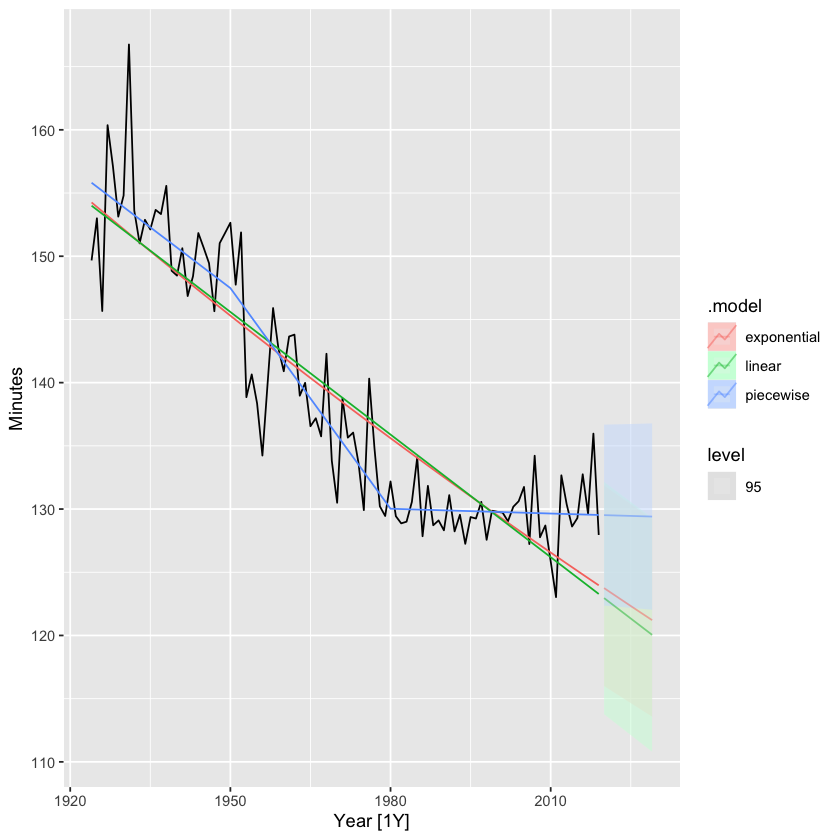

In [116]:
boston_men %>%
  autoplot(Minutes) +                            # this is the data
  geom_line(data = fitted(fit_trends),           # this are the models.
            aes(y = .fitted, colour = .model)) +
  autolayer(fc_trends, alpha = 0.5, level = 95)  # this add the forecasting

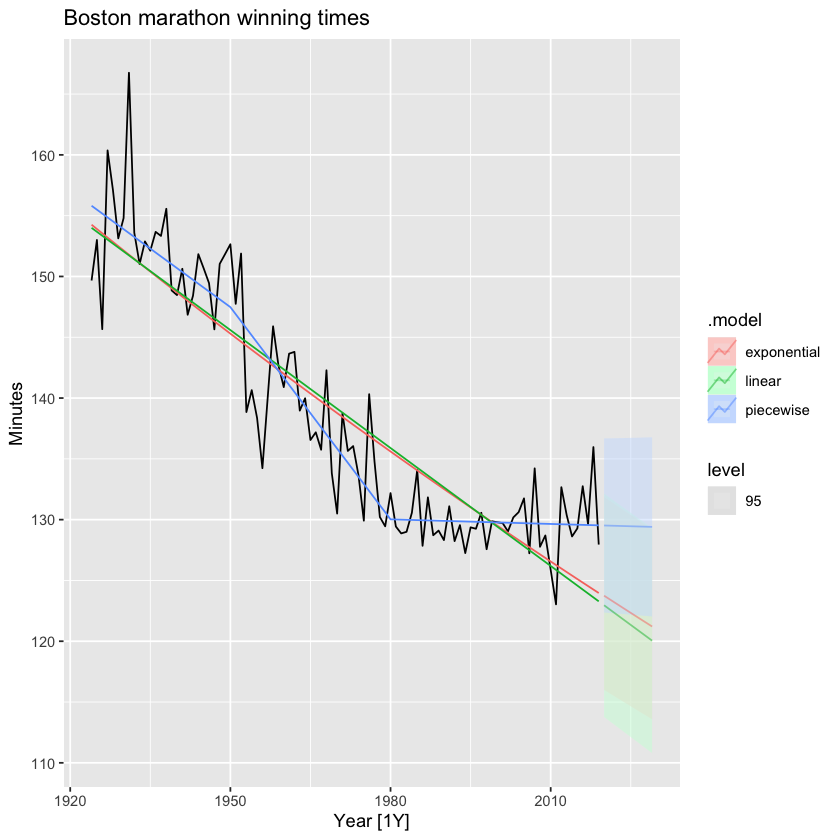

In [117]:
boston_men %>%
  autoplot(Minutes) +
  geom_line(data = fitted(fit_trends),
            aes(y = .fitted, colour = .model)) +
  autolayer(fc_trends, alpha = 0.5, level = 95) +
  labs(y = "Minutes",
       title = "Boston marathon winning times")

Projecting forecasts from linear, exponential and piecewise linear trends for the Boston marathon winning times.
- The best forecasts appear to come from the piecewise linear trend
